# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2023
## Домашнее задание 3. Робастная статистика. Доверительное оценивание.
### Дедлайн --- 14 ноября 2023 23:59

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.


В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека `scipy.stats`. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook c:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде,
* собственно кодом,
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается **в 10 баллов**.

## Пожалуйста, не переименовывайте этот ноутбук

In [ ]:
import numpy as np
from scipy import stats as sps
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="darkgrid", font_scale=1.4)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


*Условие задания*: Великая ордалия продолжает свой путь на север, однако адепты доселе неизвестной магии - Текне используют своё искусство, чтобы вмешаться в отлаженную работу имперских статистических оценок параметров, меняя им часть данных. Теперь необходимо давать такие оценки, которые выдержат фокусы волшебников консульта, чтобы Ордалия смогла дойти до Голготтерата!

Судьба многомилионной армии теперь в Ваших руках!

## Задача 1

Эта задача посвящена *робастному* оцениванию. Это такой раздел статистики, который изучает, как сильно оценки зависят от выбросов и других *неверных* данных и как построить оценки, которые выдерживают шумы.

1) Сгенерируйте выборку из трех распределений: нормального, Лапласа и Коши размера `N=500`.

Далее для всех графиков в этом задании используйте обозначенные цвета для каждого из распределений (даже если графики будут на разных осях). То есть если график касается нормального распределения то рисуйте его синим цветом.

In [ ]:
N = 500
color_normal = "blue"
color_laplace = "green"
color_cauchy = "red"
np.random.seed(42)

norm = sps.norm()
laplace = sps.laplace()
cauchy = sps.cauchy()

norm_X = norm.rvs(size = N)
laplace_X = laplace.rvs(size=N)
cauchy_X = cauchy.rvs(size=N)

2) Постройте график плотности распределения для всех трех распределений на одних осях.

In [ ]:
def show_plot(distributions, colors, labels, title, x_label, y_label):
  grid = np.linspace(-10,10,500)
  plt.figure(figsize=(16,12))
  for distribution, color_dist, label in zip(distributions, colors, labels):
    plt.plot(grid, distribution.pdf(grid), color = color_dist, label = label)
  plt.title(title)
  plt.legend()
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.show()

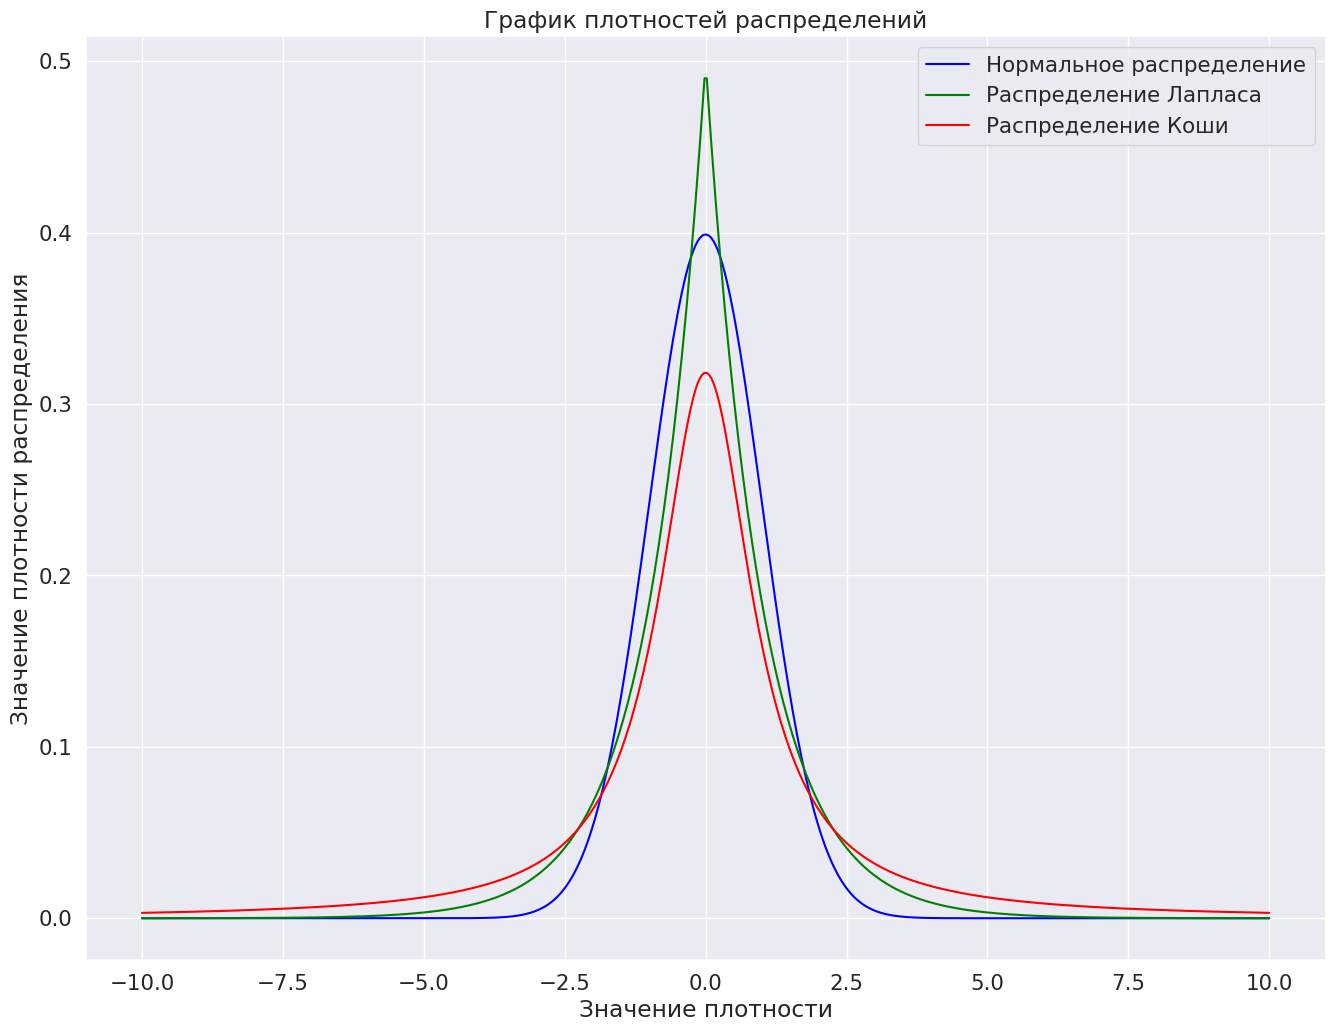

In [ ]:
distributions = (norm, laplace, cauchy)
colors = (color_normal, color_laplace, color_cauchy)
labels = ('Нормальное распределение', 'Распределение Лапласа', 'Распределение Коши')
title = 'График плотностей распределений'
x_label = 'Значение плотности'
y_label = 'Значение плотности распределения'
show_plot(distributions, colors, labels, title, x_label, y_label)

1) Мы будем оценивать параметр сдвига каждого из распределений. Сделайте предположение о том, для каких распределений параметр сдвига будет оценён точнее при помощи среднего и медианы. Докажите Ваши предположения теоретически и экспериментально. Моделировать оценки в этот раз не нужно, достаточно по одной выборке произвести оценивание и проверить его точность.

**Ответ:**

Из задания 1 для распределения Коши вспомним полученные выводы:


Cреднее значение является более чувствительным к выбросам, в то время как медиана является более устойчивой оценкой в случае когда у распределения тяжелый хвост как например у распределения Коши.

Получается что, лучшие ассимптотические свойства имеет медиана. Она является состоятельной, то есть с увеличением размера выборка меньше отклоняется от значения параметра и ассимптотически нормальной.

Для нормального распределения: Среднее и медиана являются одинаково точными оценками параметра сдвига (среднего), так как нормальное распределение симметрично и параметр сдвига совпадает с обоими оценками.

Для распределения Лапласа: Среднее может быть менее точным, чем медиана, потому что Лапласово распределение имеет "тяжелые хвосты", что делает его более чувствительным к выбросам. Медиана менее подвержена воздействию выбросов и представляет собой более устойчивую оценку.

Промоделируем и посмотрим верны ли предположения

In [ ]:
def show_mean_and_median_plot(X, mean, median, title, color, subplot):
  plt.figure(figsize=(16, 12))
  plt.subplot(subplot)
  plt.hist(X, bins=50, color=color, alpha=0.5)
  plt.title(title)
  plt.axvline(mean, color='orange', linestyle='dashed', linewidth=2, label='Среднее')
  plt.axvline(median, color='yellow', linestyle='dashed', linewidth=2, label='Медиана')
  plt.xlim(-5, 5)
  plt.legend()

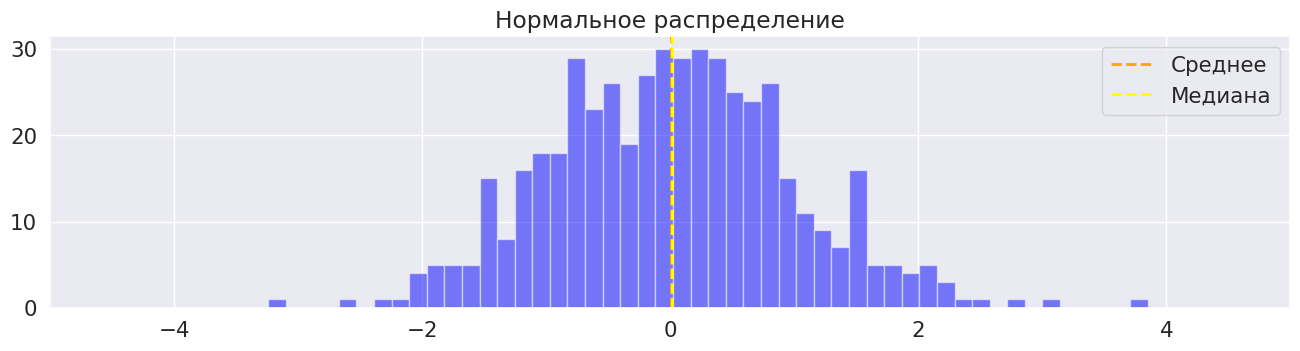

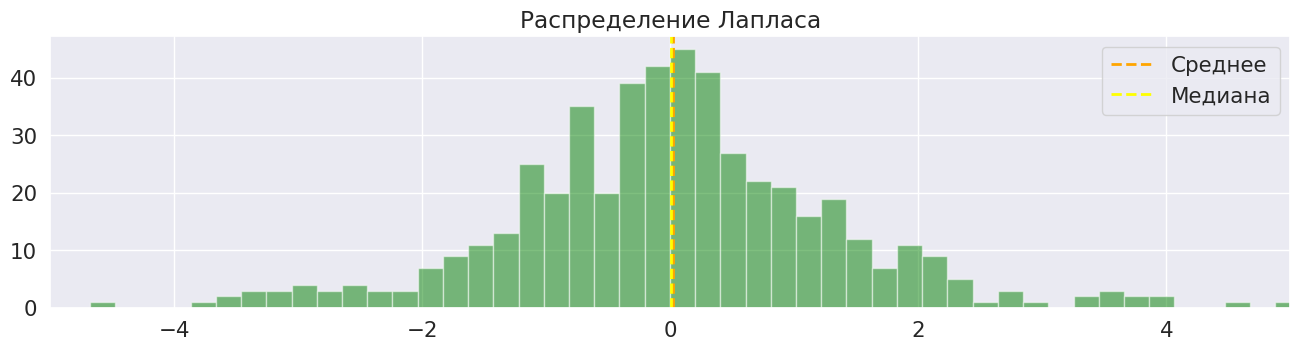

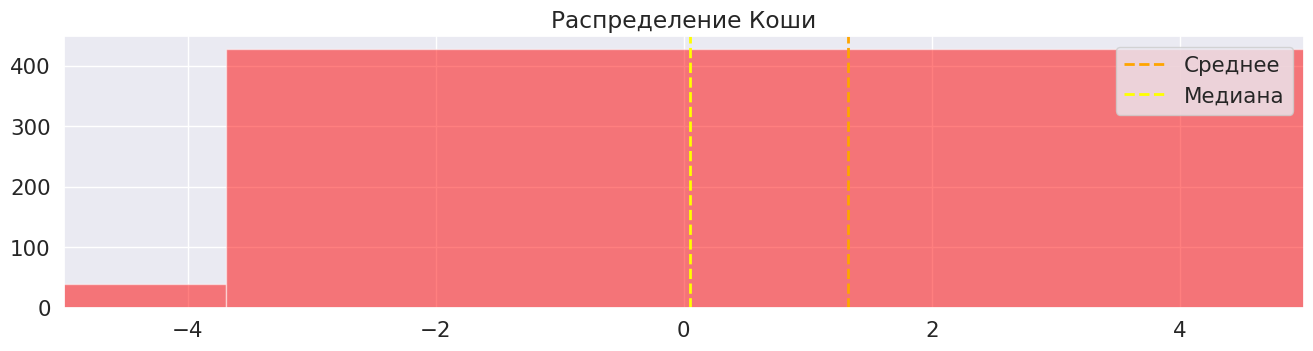

In [ ]:
# Оценка параметра сдвига средним и медианой
mean_normal = np.mean(norm_X)
median_normal = np.median(norm_X)

mean_laplace = np.mean(laplace_X)
median_laplace = np.median(laplace_X)

median_cauchy = np.median(cauchy_X)
mean_cauchy = np.mean(cauchy_X)

show_mean_and_median_plot(norm_X, mean_normal, median_normal, labels[0], colors[0], 311)
show_mean_and_median_plot(laplace_X, mean_laplace, median_laplace, labels[1], colors[1], 312)
show_mean_and_median_plot(cauchy_X, mean_cauchy, median_cauchy, labels[2], colors[2], 313)

Видим что догадки подтвердились

3) Часто, в реальной жизни, мы сталкиваемся с данными в которых есть выбросы возникшие, например, из-за опечаток. Пусть в выборке содержится 99 точек на интервале $[0;1]$ и один элемент равный 300. Тогда среднее значение нашей выборки будет не меньше трех. Ясно, что так дело не пойдет, что же делать?

Можно использовать медиану или **усеченное среднее**.

**Усеченное среднее порядка $\alpha$** это среднее составленное из выборки от которой отрезаны $\alpha$ и $1 - \alpha$ квантили. Как ее получить?


1.   Отсортировать выборку
2.   Отрезать первые и последние ($\alpha \cdot \text{размер выборки}$) элементов выборки
3.   Посчитать среднее полученной выборки

Напишите функцию для подсчета этой статистики. Реализуйте усечённое среднее для одной выборки, но разных $\alpha$. На одних осях постройте распределение оценки для разных $\alpha$. Как оно изменяется?

In [ ]:
import math

def truncated_mean(sample, alpha=0.3):
  sample.sort()
  size = len(sample)
  sample = sample[int(alpha * size) : int((1 - alpha) * size)]
  truncated_mean = np.mean(sample)
  return truncated_mean

[0.4939083836825219, 0.4912539492237079, 0.4890646924045067, 0.47998995032763414]


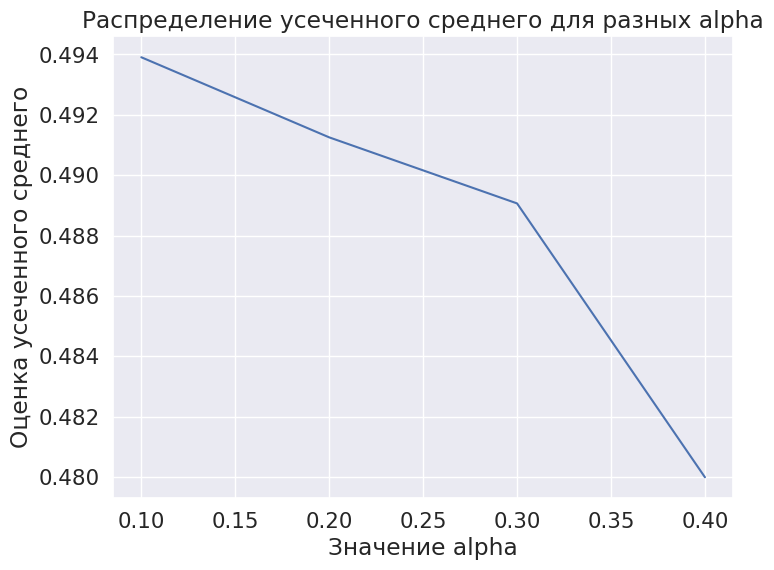

In [ ]:
sample = np.random.uniform(0, 1, 99)
sample = np.append(sample, np.array([300]))
alphas = [0.1, 0.2, 0.3, 0.4]
truncated_means = []
for alpha in alphas:
    estimate = truncated_mean(sample, alpha)
    truncated_means.append(estimate)
print(truncated_means)
plt.figure(figsize=(8, 6))
plt.plot(alphas, truncated_means)
plt.xlabel('Значение alpha')
plt.ylabel('Оценка усеченного среднего')
plt.title('Распределение усеченного среднего для разных alpha')
plt.show()

Заметим, что самое близкое к точному значению достигается при $\alpha = 0.1$

4) Постройте график квадрата разности каждой из оценок и истинного значения параметра в зависимости от роста размера выборки для разных $\alpha$. Сделайте выводы, какие оценки точнее.

In [ ]:
sample_sizes = np.arange(10, 1001, 10)
squared_errors = {alpha: [] for alpha in alphas}
true_parameter = 0
for alpha in alphas:
    for size in sample_sizes:
        sample = np.random.normal(0, 1, size)
        estimate = truncated_mean(sample, alpha)
        squared_error = (estimate - true_parameter) ** 2
        squared_errors[alpha].append(squared_error)

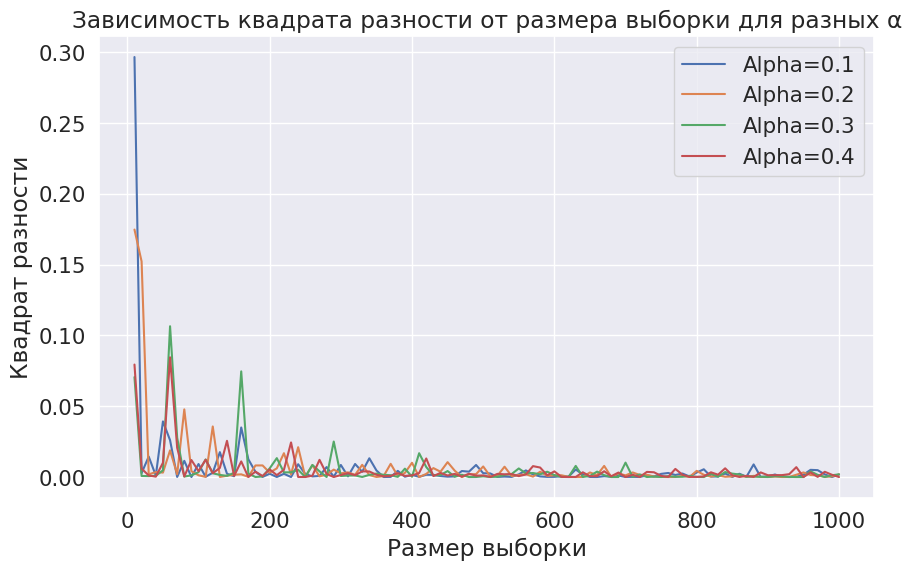

In [ ]:
plt.figure(figsize=(10, 6))
alphas = [0.1, 0.2, 0.3, 0.4]

for alpha in alphas:
    plt.plot(sample_sizes, squared_errors[alpha], label=f'Alpha={alpha}')

plt.xlabel('Размер выборки')
plt.ylabel('Квадрат разности')
plt.title('Зависимость квадрата разности от размера выборки для разных α')
plt.legend()
plt.show()

На графике видно, что чем меньше $\alpha$ тем точнее оценка, в нашем случае это может быть связано с тем что выброс всего-лишь 1 и при маленьком $\alpha$ он удаляется, а так же выборка теряет минимальное число 'нормальных' элементов из $[0, 1]$

**Теорема**
Пусть распределение симметрично относительно нуля и имеет одну моду в нуле, тогда асимптотическая дисперсия усеченного среднего порядка $\alpha$ может быть выражена по формуле:
$$
\sigma^2(\alpha) = 2\cdot\frac{\int_0^{u_{1 - \alpha}} x^2 dF(x) + \alpha\cdot(u_{1 - \alpha})^2}{(1 - 2\alpha)^2},
$$

где $u_\alpha$ – квантиль порядка $\alpha$.

Вычислите дисперсию и постройте график дисперсии в зависимости от $\alpha$.

*Подсказка.* Для численного интегрирования используйте функцию `quad` из модуля `scipy.integrate`

In [ ]:
from scipy.integrate import quad

def asymptotical_var(distribution, alpha):
  u = distribution.ppf(1 - alpha)
  integral = quad(func = lambda x: x** 2 * distribution.pdf(x), a = 0, b = u)[0]
  return 2 * (integral + alpha*(np.square(u))) / (1 - 2 * alpha)**2

4.5) Дополнительный пункт на 5 баллов.

Докажите предложенную теорему.

5) Постройте графики для асимптотической дисперсии в зависимости от $\alpha$ для всех трех распределений на назных осях (используйте `plt.subplots(1, 3, figsize=(21,7))`). **Не забудьте про цвета**. Для загаловка графика используйте `ax[i].set_title`, для заголовка всей картинки используйте `fig.suptitle`. Сравните результаты с теоретической

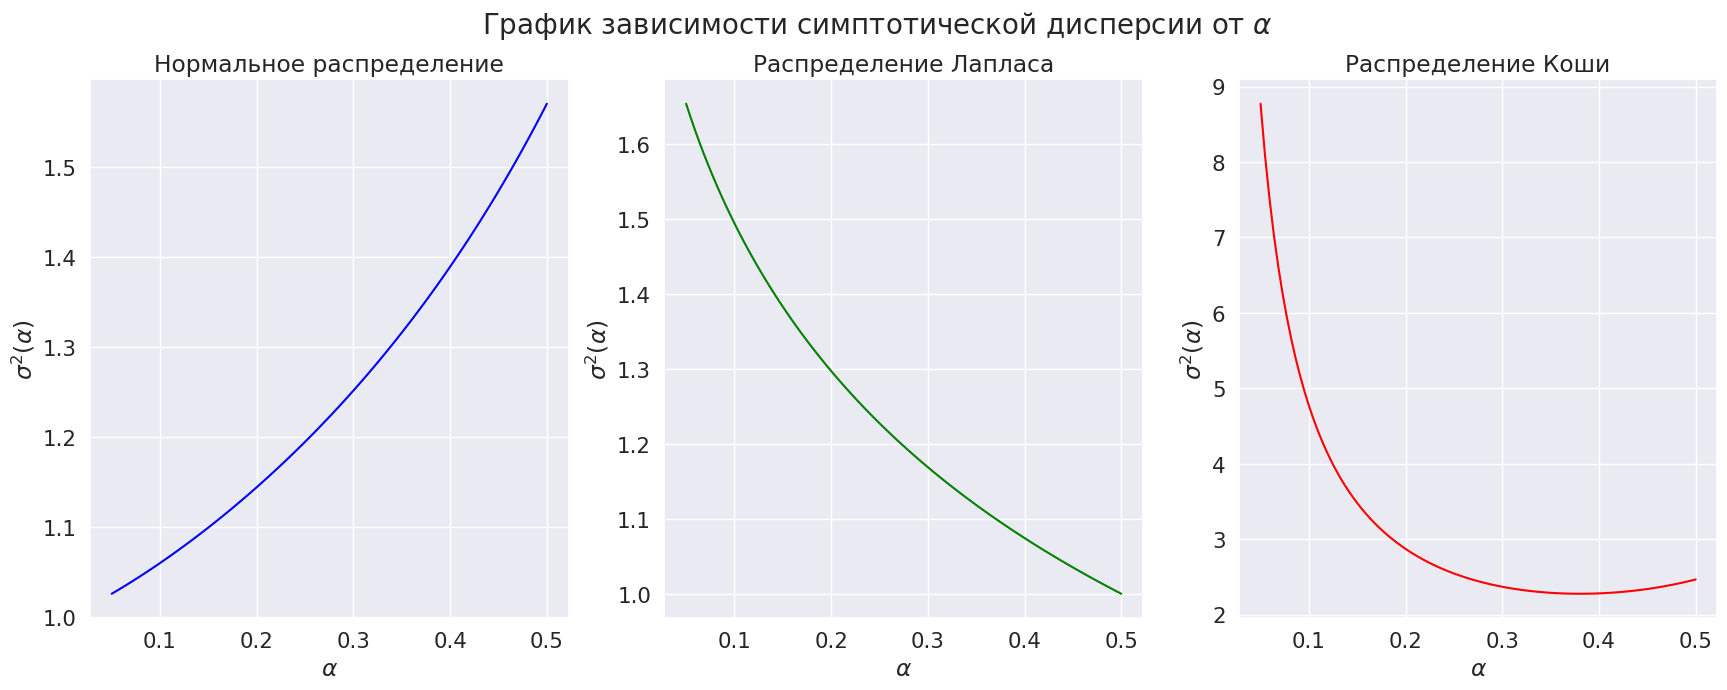

In [ ]:
alphas = np.linspace(0.05, 0.49999, 100)
asymp_var_norm = [asymptotical_var(norm, alpha) for alpha in alphas]
asymp_var_laplace = [asymptotical_var(laplace, alpha) for alpha in alphas]
asymp_var_cauchy = [asymptotical_var(cauchy, alpha) for alpha in alphas]
asym_var_array = [asymp_var_norm, asymp_var_laplace, asymp_var_cauchy]
fig, ax = plt.subplots(1, 3, figsize=(21,7))
titles = ['Нормальное распределение', 'Распределение Лапласа', 'Распределение Коши']
for i in range(0, 3):
  ax[i].plot(alphas, asym_var_array[i], color=colors[i])
  ax[i].set_title(titles[i])
  ax[i].set_xlabel(r'$\alpha$')
  ax[i].set_ylabel(r'$\sigma^2(\alpha)$')

fig.suptitle('График зависимости симптотической дисперсии от $\\alpha$', fontsize=20)
plt.show()

Из курса "Математическая статистика" мы знаем что усеченное среднее порядка 0 - это математическое ожидание, а порядка 0.5 - медиана. По графику видно что для нормального распределения чем меньше  $\alpha$  тем меньше дисперсия, а следовательно лучше в качестве оценки использовать среднее. Для распределения Лапласа, наоборот лучше использовать медиану. А для распределения Коши видим, что на графике происходит взлет у среднего, а минимаьное значение дисперсии достигается примерно при  $\alpha$ = 0.35, то есть усеченное среднее порядка 0.35.

6) Breakdown point в статистике называется такое наибольшее число x от 0 до 100, что если изменить x% значений выборки, то значение оценки не потеряет в точности. Эквивалентно, если заменить хотя бы x+1% значений, можно получить сколь угодно плохую оценку.

Предположите, как Breakdown point зависит параметра $\alpha$.

Ответ:

Для усеченного среднего с параметром αα breakdown point можно оценить следующим образом:
BP=100(1−$2\alpha$)

Это выражение следует из того, что усеченное среднее отсекает αα квантиль с обеих сторон, и, следовательно, $2\alpha$ данных. Таким образом, максимальная доля выбросов, которую можно внести, чтобы оценка осталась устойчивой, равна 1−$2\alpha$.

Из выражения видно, что чем меньше значение параметра α, тем выше breakdown point. Таким образом, уменьшение $\alpha$ повышает устойчивость оценки к выбросам, но за счет уменьшения точности оценки для нормальных данных.

И проверьте своё предположение моделированием. Будем считать, что вместо произвольных x% выборки будет записано какое-то заранее подобранное достаточно большое число с положительным или отрицательным знаком.

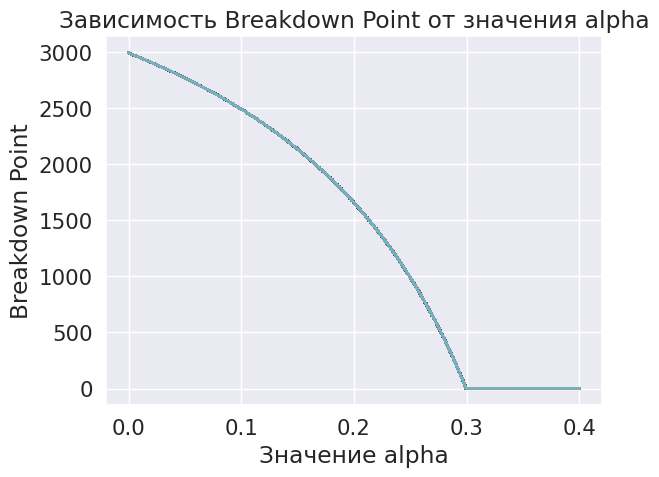

In [ ]:
def truncated_mean(sample, alpha=0.3):
  sample.sort()
  size = len(sample)
  sample = sample[int(alpha * size) : int((1 - alpha) * size)]
  truncated_mean = np.mean(sample)
  return truncated_mean


def simulate_breakdown_point(alpha_values, outlier_percentage, num_simulations=1000):
    breakdown_points = []

    for alpha in alpha_values:
        num_outliers = int(outlier_percentage * 0.01 * num_simulations)
        simulated_data = np.random.normal(0, 1, size=num_simulations)
        simulated_data[:num_outliers] = 10000  # Заменяем outlier_percentage% значений на большое число
        estimates = [truncated_mean(simulated_data, alpha) for _ in range(num_simulations)]
        breakdown_points.append(estimates)

    return breakdown_points

alpha_values = np.linspace(0, 0.4, 1000)
outlier_percentage = 30  # Процент выбросов

# Моделируем breakdown point
breakdown_points = simulate_breakdown_point(alpha_values, outlier_percentage)

plt.plot(alpha_values, breakdown_points)
plt.xlabel('Значение alpha')
plt.ylabel('Breakdown Point')
plt.title('Зависимость Breakdown Point от значения alpha')
plt.grid(True)
plt.show()

Действительно, чем больше $α$ тем меньше значение breakdown point

7) Для каждого распределение на отдельном графике постройте значение трех оценок: среднего, медианы и усученного среднего порядка $0.35$. Для усеченного среднего проведите линию пунктиром (`fmt="--"`), для медианы точечками (`fmt=":"`). **Не забудьте про цвета**. То есть цвета на одном графике одинаковые, разные оценки отличает только формат линии.

**Ниже посчитайте все оценки необходимые для всех распределений**

In [ ]:
norm_mean = np.cumsum(norm_X) / np.arange(1, N + 1)
laplacain_mean = np.cumsum(laplace_X) / np.arange(1, N + 1)
cauchy_mean = np.cumsum(cauchy_X) / np.arange(1, N + 1)

norm_median = np.array([np.median(norm_X[:i]) for i in range(1, N + 1)])
laplacain_median = np.array([np.median(laplace_X[:i]) for i in range(1, N + 1)])
cauchy_median = np.array([np.median(cauchy_X[:i]) for i in range(1, N + 1)])

norm_trunc_mean = np.array([truncated_mean(norm_X[:i], 0.35) for i in range(1, N + 1)])
laplacain_trunc_mean = np.array([truncated_mean(laplace_X[:i], 0.35) for i in range(1, N + 1)])
cauchy_trunc_mean = np.array([truncated_mean(cauchy_X[:i], 0.35) for i in range(1, N + 1)])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
def show_distr_mean_median_trunc(N, mean, median, trunc_mean, color, title):
  grid = np.arange(1, N + 1)
  plt.figure(figsize = (20, 15))
  plt.plot(grid, mean, color = color, label = 'mean')
  plt.plot(grid, median, color = color, linestyle = ':', label = 'median')
  plt.plot(grid, trunc_mean, color = color, linestyle = '--', label = 'truncated mean')
  plt.xlabel('Размер выборки')
  plt.ylabel('Значение оценки')
  plt.title(title)
  plt.legend()
  plt.show()

**Нормальное распределение**

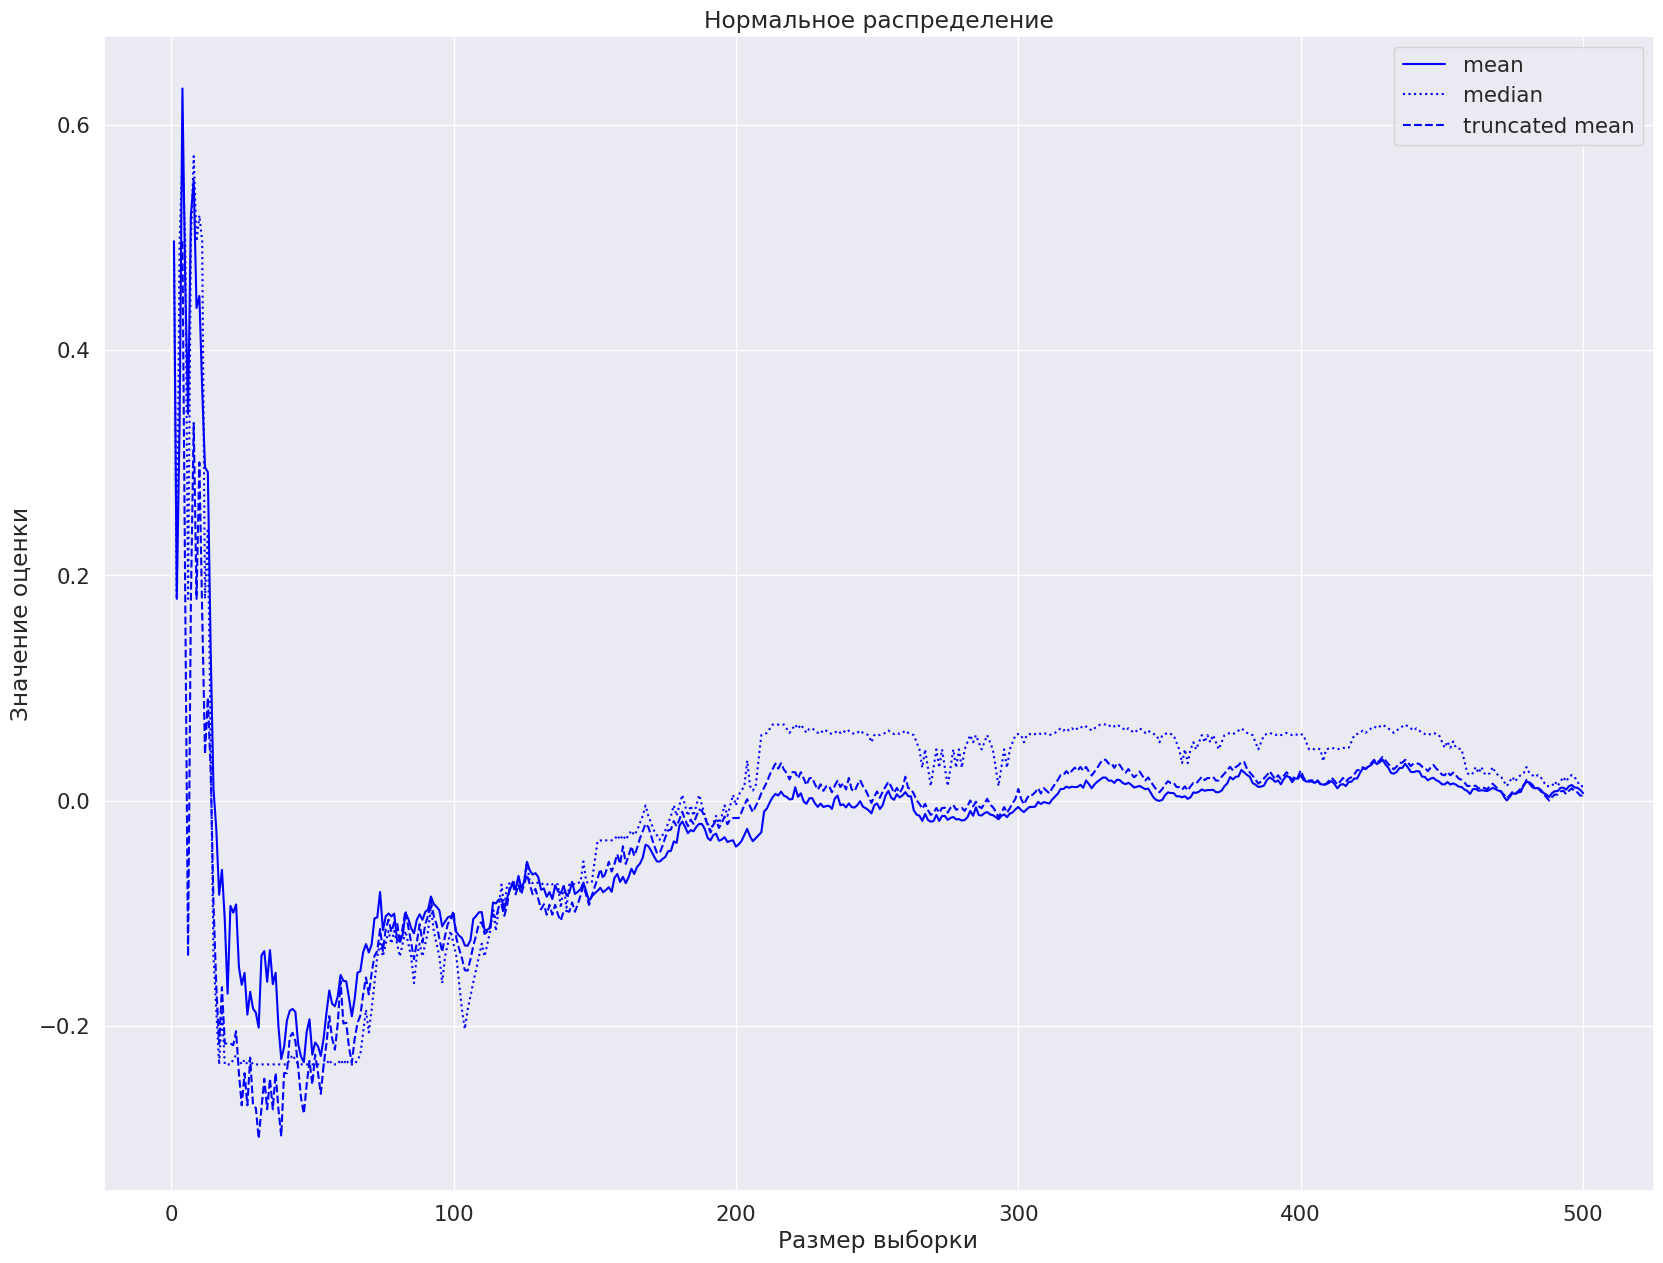

In [ ]:
show_distr_mean_median_trunc(N, norm_mean, norm_median, norm_trunc_mean, colors[0], 'Нормальное распределение')

**Распределение Лапласа**

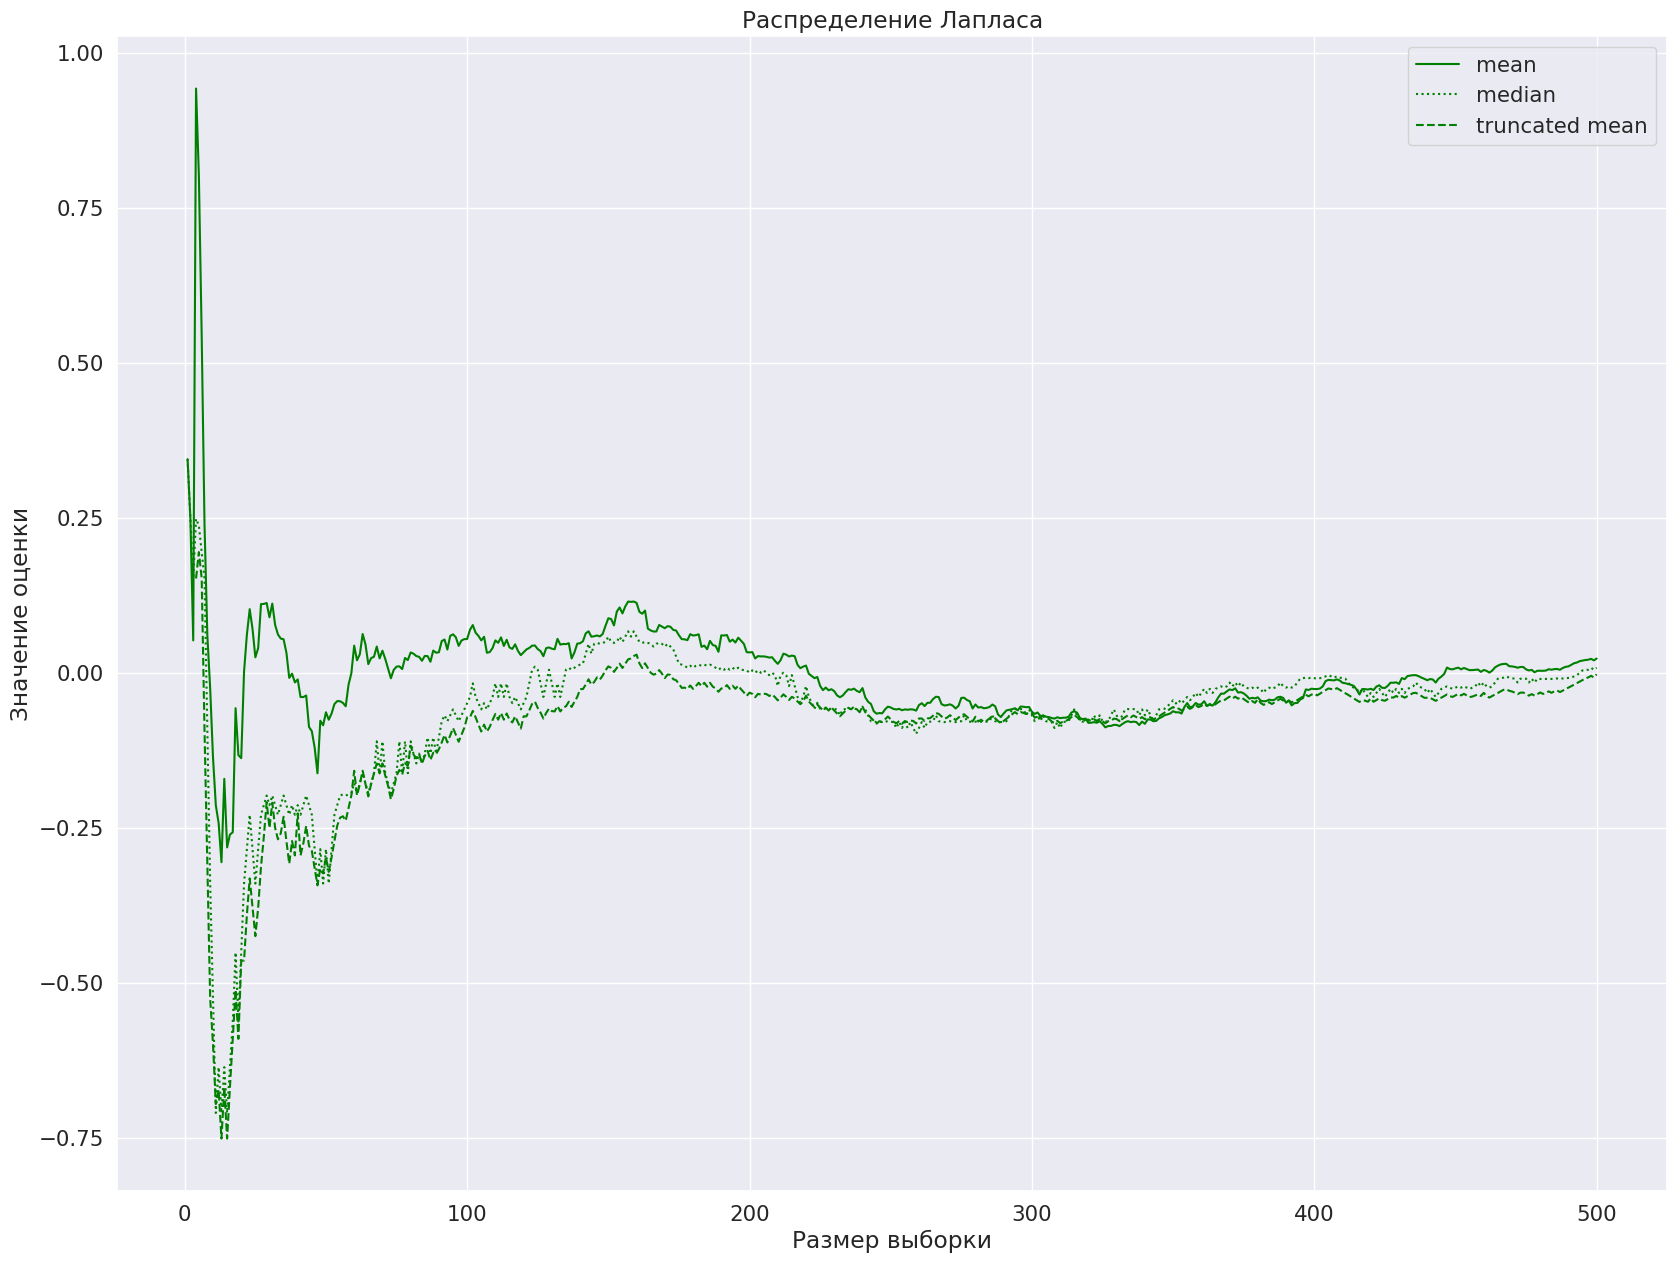

In [ ]:
show_distr_mean_median_trunc(N, laplacain_mean, laplacain_median, laplacain_trunc_mean, colors[1], 'Распределение Лапласа')

**Распределение Коши**

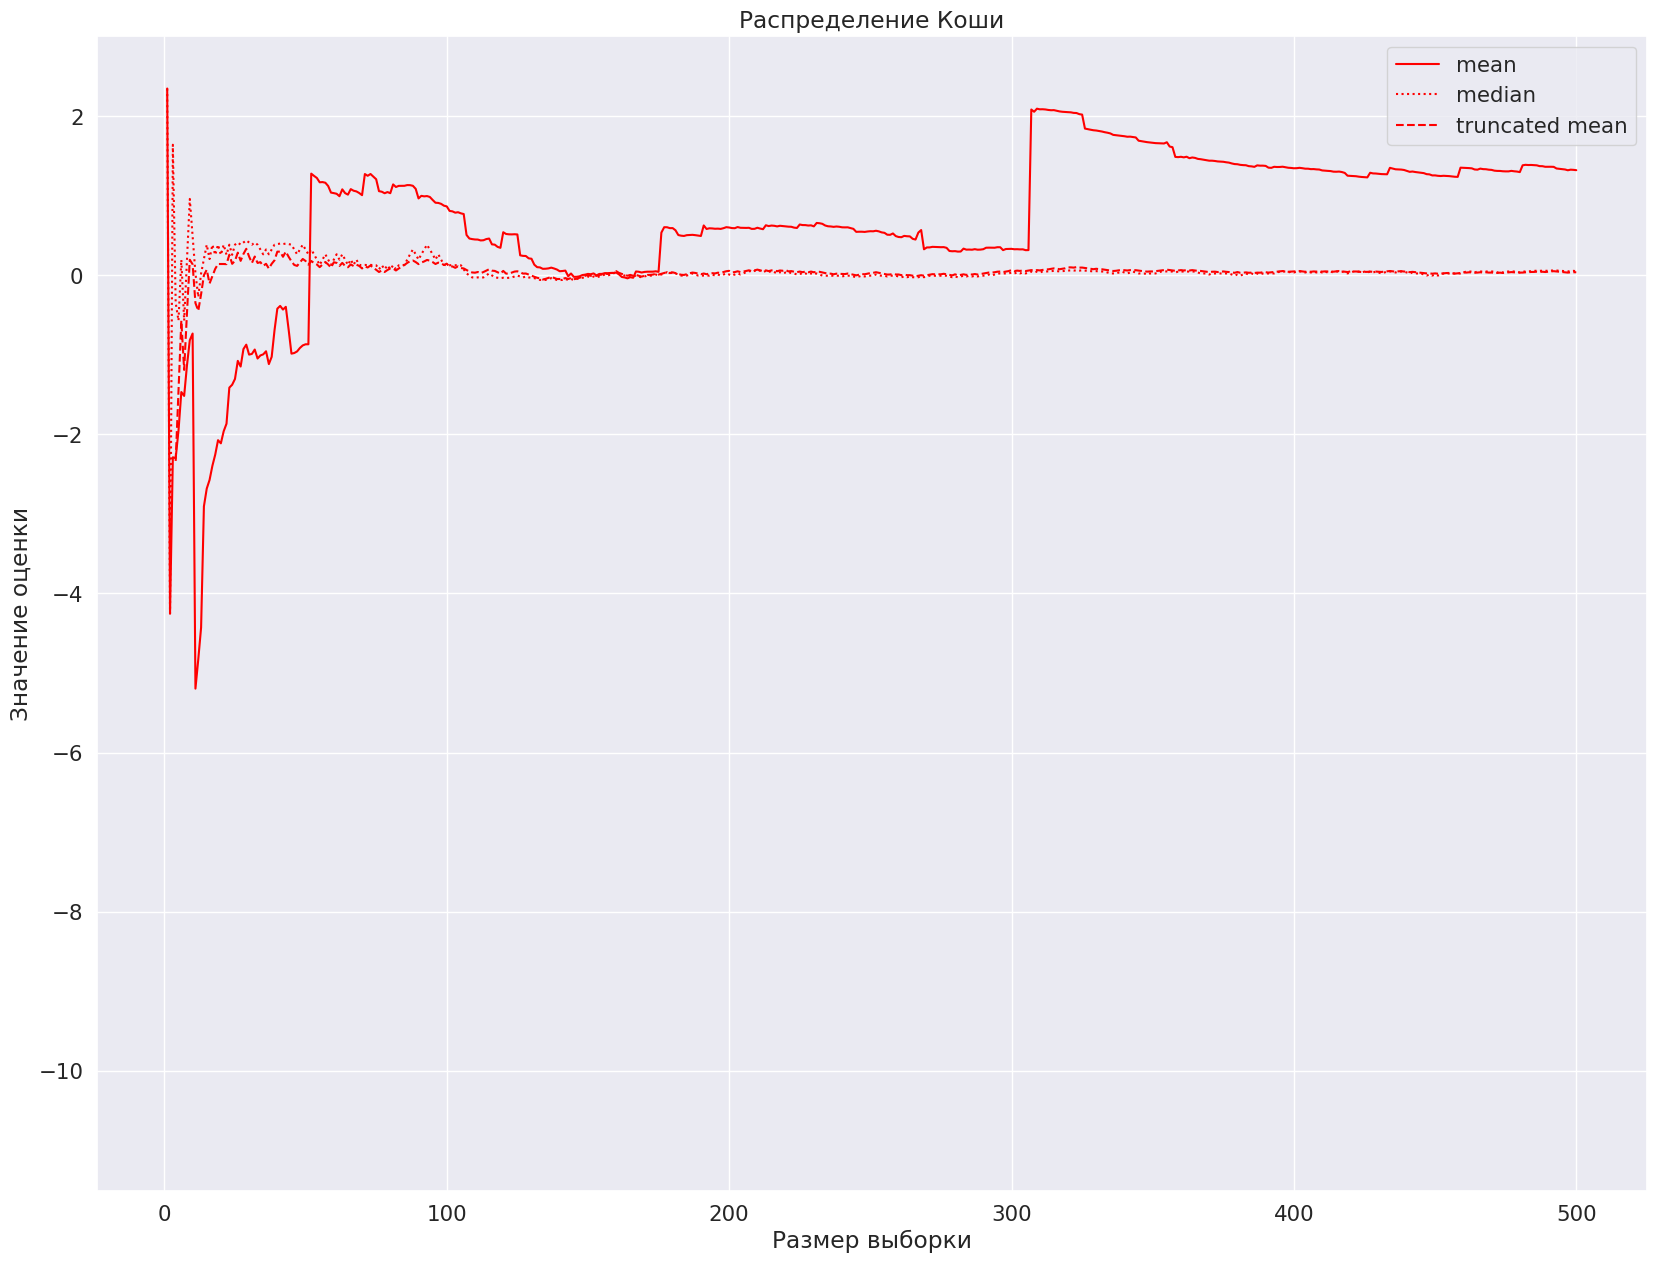

In [ ]:
show_distr_mean_median_trunc(N, cauchy_mean, cauchy_median, cauchy_trunc_mean, colors[2], 'Распределение Коши')

Проанализируйте полученные графики. Проанализируйте графики дисперсий оценок. Сделайте выводы.

Для нормального распределения и распределения Лапласа оценки не сильно отличаются с увеличением размера выборки. А для распределения Коши медиана и усеченное среднее ведут себя гораздо устойчивее чем стандартное среднее, которое сильно скачет из-за выбросов.Но в теории мы знаем что распределение Коши не имеет среднего, и именно поэтому график среднего 'улетел'.

**Опциональная часть для самых смелых (20 баллов)**

Мы знаем, что существует Оценка Максимального правдоподобия:

$\hat{\theta} = argmin_{\theta}(-log(f_{\theta}(x)))$, $f_{\theta}(x)$ --- правдоподобие выборки. В таком же виде можно выписать и оценки средним, медианой и усечённым средним:

$\hat{\theta} = argmin_{\theta}(\sum_{i=1}^n\rho(x_i - \theta))$.

В общем случае, такая оценка называется обобщённой оценкой максимального правдоподобия или $M$-оценкой. Функция $\rho$ называется функцией влияния.

1) Как должна выглядеть функция $\rho$, чтобы результатом было усечённое среднее?

Ответ:

2) Эквивалентно задачу оптимизации можно писать в виде системы уравнений $(\sum_{i=1}^n\psi(x_i - \theta)) = 0$. Сравните два определения и скажите, какое из них шире (определяет больше возможных оценок) и как они связаны.

Ответ:

3) Самое интересное. Для трёх распределений из первой части постройте M-оценки для разных функций $\rho$ или $\psi$. Ищите максимум градиентным спуском, а ноль функции --- методом Ньютона.

Примеры функций влияния можно взять вот тут: https://en.wikipedia.org/wiki/Robust_statistics#M-estimators

Ещё можно попросить в чате Том Древних Заклинаний (книжку по робастной статистике) и прочитать там главу 3, где есть примеры M- и L- оценок (что такое L-оценка при желании можете узнать там же сами)

4) Сравните результаты, полученные для трёх распределений и разных функций влияния.

5) Оцените Breakdown point предложенных функций. Сделайте вывод о том, как взаимосвязаны точность оценки и Breakdown point.

Сделайте единый вывод о робастном оценивании:

*Дисклеймер: * 20 баллов будет ставиться только в случае, если Вы попробуете хотя бы 5 существенно различающихся функций влияния и построите хотя бы одну L-оценку (без которой будет 15), а так же укажете, в каких оценках лучше точность и лучше Breakdown Point. В идеале нужно решить трейдофф между точностью и робастностью.

# Задача 2

## Wine dataset

Да, аспект-император взял с собой лучшее вино Трёх Морей и пьёт его, пока идёт битва! В этой задаче Вам предлагается поработать с реальными данными и провести оценивания состава вина.

Давайте загрузим и проанализируем датасет, состоящий из различных показателей для красного вина и оценок сомелье.

In [ ]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta

Downloading...
From: https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta
To: /content/winequality-red.csv
100% 101k/101k [00:00<00:00, 76.1MB/s]


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("winequality-red.csv")

In [ ]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Поделите вина на три категории по содержанию алкоголя. Добавьте колонку `"category"` со значениями `"low alcohol"`, `"medium alcohol"`, `"high alcohol"` для относительного объемного содержания алкоголя `x<=10`, `10 < x <= 12`, `x > 12` соответственно.

In [ ]:
data['category'] = data['alcohol'].apply(lambda x : 'low alcohol' if x <= 10 else 'medium alcohol' if 0 < x <= 12 else 'high alcohol')

In [ ]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low alcohol
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low alcohol
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low alcohol
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,low alcohol
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low alcohol
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,low alcohol
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,low alcohol
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,low alcohol
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,low alcohol
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,medium alcohol


Для каждой категории посчитайте среднее и медиану содержания остаточного сахара (`"residual sugar"`). Сделайте pandas.DataFrame с индексами в виде категории содержания алкоголя и колнками в виде среднего и медианы.

In [ ]:
df = pd.DataFrame(data.groupby('category')['residual sugar'].agg([np.mean, np.median])).reset_index()

In [ ]:
df.set_index(df['category'], inplace = True)

In [ ]:
df

,category,mean,median
category,,,
high alcohol,high alcohol,2.760993,2.3
low alcohol,low alcohol,2.445984,2.1
medium alcohol,medium alcohol,2.592264,2.2


Что можно сказать о распределении сахара по этим категориям? О распределении остаточного сахара в целом?

**Ответ:**

С увеличением кол-ва алкоголя увеличивается количество сахара

"high alcohol" имеет более высокие средние и медианные значения остаточного сахара по сравнению с другими категориями. Это может указывать на то, что более крепкие напитки чаще содержат больше остаточного сахара

 "low alcohol" имеет самые низкие средние и медианные значения, что может свидетельствовать о том, что напитки с низким содержанием алкоголя чаще бывают менее сладкими

 "medium alcohol" находится между "high alcohol" и "low alcohol" по значениям среднего и медианы

 Так же у всех категорий значение среднего больче чем значение медианы, что говорит о наличии выбросов.

 Для более точного анализа распределения можно так же рассмотреть дисперсию, построить гистограммы дл визуализации

Постройте `boxplot` для остаточного сахара по категориям, полученным ранее на основании доли алкоголя.

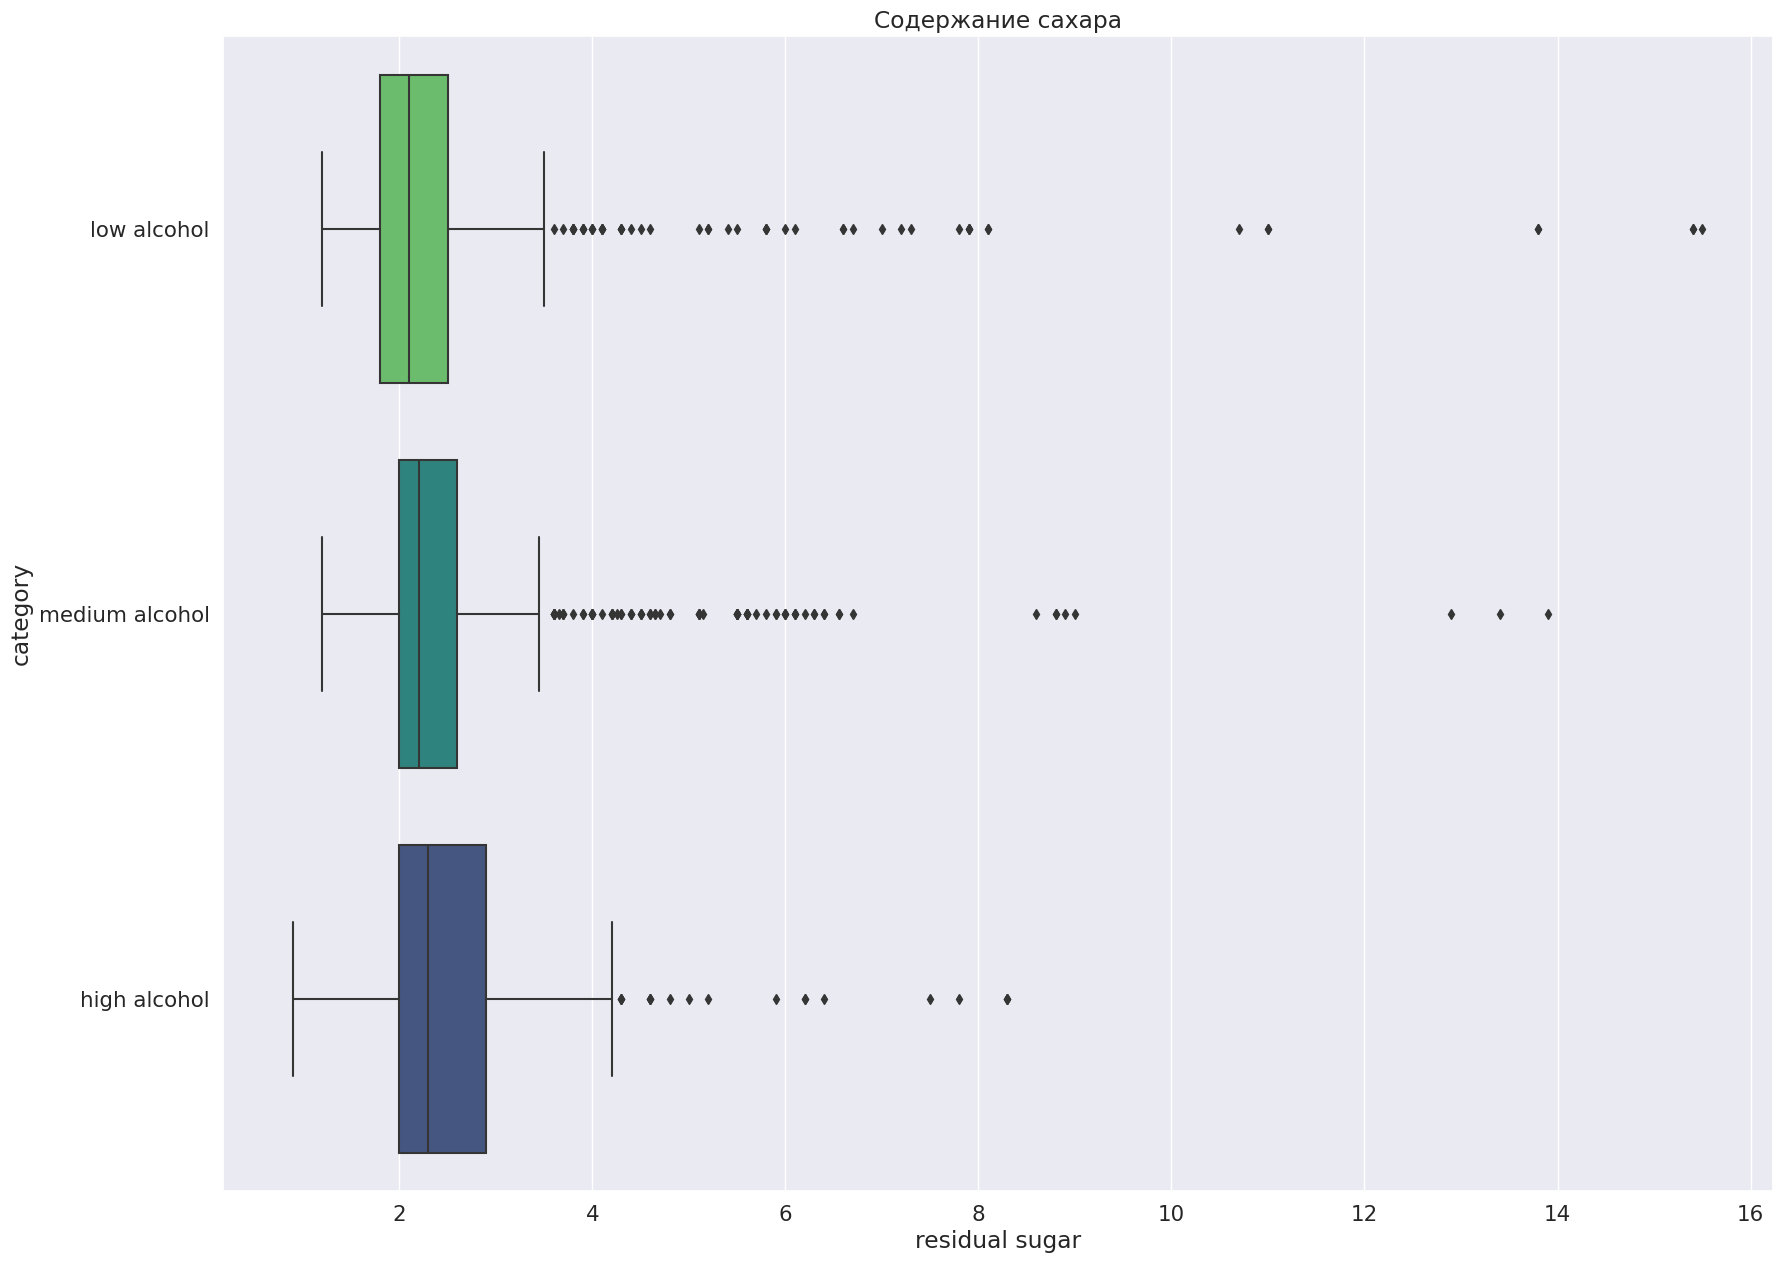

In [ ]:
palette = sns.color_palette("viridis", n_colors=3)[::-1]
#YOUR CODE GOES HERE
plt.figure(figsize = (20, 15))
sns.boxplot(x=data['residual sugar'], y = data['category'], palette = palette)
plt.title("Содержание сахара")
plt.show()

Как соотнясятся оценки из предыдущего пункта и график сверху? Что лучше использовать для оценивания содержания сахара: медиану или среднее? Почему?

**Ответ:**

Нв графике медианы почти совпали с посчитанными ранее. Так же в каждой катеригории есть выбросы, поэтому лучше использовать медиану для оценивания содержания сахара, так как среднее будет сильно смещаться в сторону выбросов. Наибольший разброс по значению остаточного сахара у крепких вин, буз учета выбросов. Так же значения остаточного сахара в в среднем выше чем у слабоалкогольных и среднеалкогольных вин.


Проанализируйте обе выборки на предмет выбросов. Сколько их? Какую оценку параметра сдвига лучше использовать (считая обе выборки нормальными)?

Ответ: ???

Постройте один `scatterplot` (используйте `seaborn`) для очень хороших и очень плохих вин (`quality == 3`, `quality == 8`) в зависимости от содержания алкоголя (`alcohol` **не** из предыдущего пункта, а из колонки исходного датасета) и от количества лимонной кислоты (`citric acid`). Используйте `palette=[palette[0]]+[palette[-1]]`.

<ipython-input-29-65e48f54e78b>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=good, x="alcohol", y="citric acid", label='Хорошее вино', palette=[palette[0]]+[palette[-1]])
<ipython-input-29-65e48f54e78b>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=bad, x="alcohol", y="citric acid", label='Плохое вино', palette=[palette[0]]+[palette[-1]])


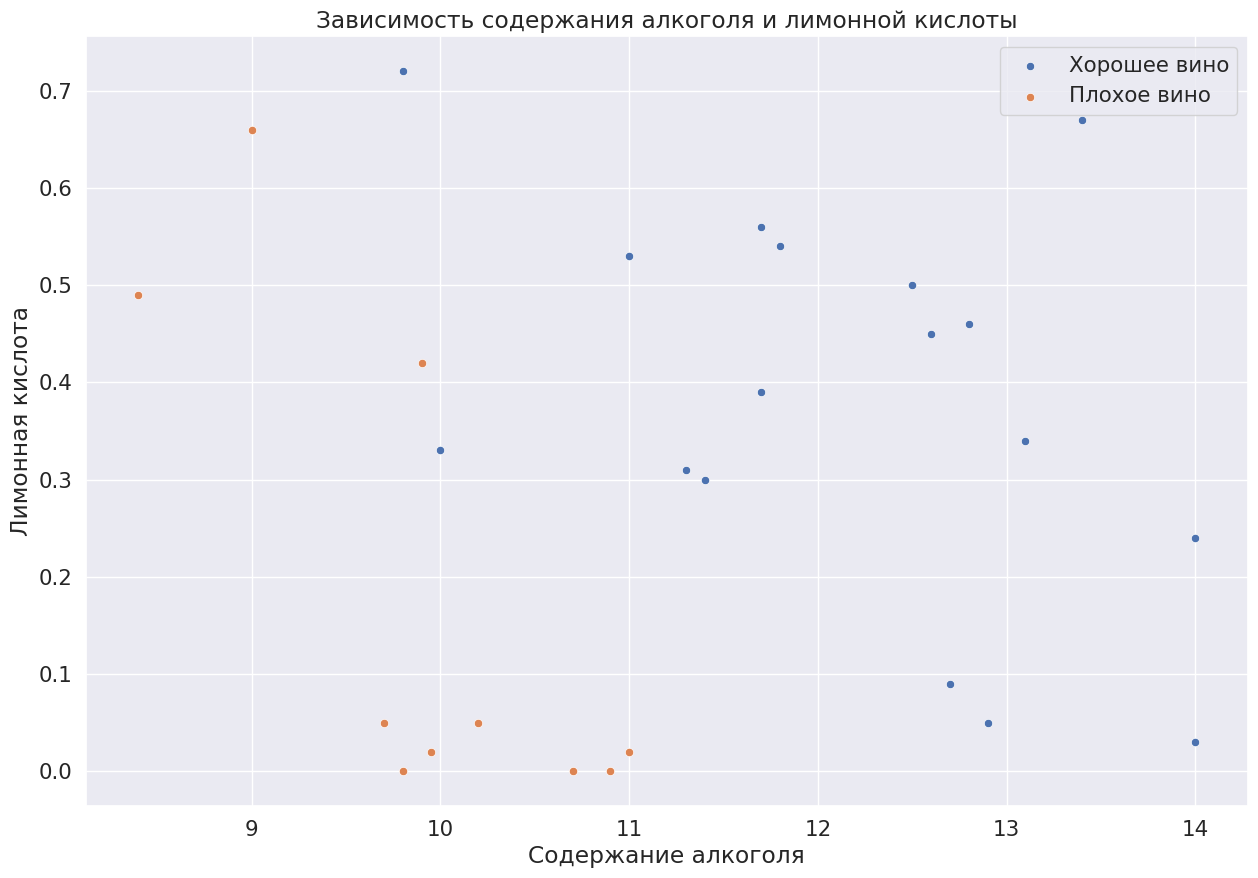

In [ ]:
#YOUR CODE GOES HERE
good = data[data['quality'] ==8][['alcohol', 'citric acid']]
bad = data[data['quality'] == 3][['alcohol', 'citric acid']]
plt.figure(figsize=(15,10))
sns.scatterplot(data=good, x="alcohol", y="citric acid", label='Хорошее вино', palette=[palette[0]]+[palette[-1]])
sns.scatterplot(data=bad, x="alcohol", y="citric acid", label='Плохое вино', palette=[palette[0]]+[palette[-1]])
plt.title('Зависимость содержания алкоголя и лимонной кислоты')
plt.xlabel('Содержание алкоголя')
plt.ylabel('Лимонная кислота')
plt.show()

Найдите ОМП для двух этих распределений в предположении, что обе выбоки из многомерного нормального распределения. Не мудрите, $\mu$ и $\Sigma$ получаются в одну команду через `numpy`. Далее получите плотности для сетки `X`, `Y`. Используйте `sps.multivariate_normal`.

In [ ]:
good_mu = good.mean()
bad_mu = bad.mean()
good_cov = np.cov(good.T, bias=True)
bad_cov = np.cov(bad.T, bias=True)
X, Y = np.linspace(8, 15, 200), np.linspace(-0.4, 1, 200)

border = np.transpose([np.tile(X, Y.size), np.repeat(Y, X.size)]).reshape((Y.size, X.size, 2))

good_pdf = sps.multivariate_normal(mean=good_mu, cov=good_cov).pdf(border)
bad_pdf = sps.multivariate_normal(mean=bad_mu, cov=bad_cov).pdf(border)

In [ ]:
print(f'low mu = {good_mu}')
print(f'high mu = {bad_mu}')

low mu = alcohol        12.094444
citric acid     0.391111
dtype: float64
high mu = alcohol        9.955
citric acid    0.171
dtype: float64


Предложите свои робастные (устойчивые к выбросам) оценки параметров $\mu$, $\sigma$, посчитайте их. Сравните результат с ОМП. Какой оценке больше доверия?

Можем попробовать использовать медиану и усеченную матрицу ковариации

Нарисуйте график плотности с линиями контура и нанесите точки выборки. Используйте зеленый цвет для вина плохого качества (`get_density_cmap("Greens")` и `"g"` для точек) и синий для вина хорошего качества (`get_density_cmap("Blues")` и `"b"`). Используйте функции `plt.pcolormesh`, `plt.clabel` и `plt.scatter`. Не забудьте про `plt.xlabel`, `plt.ylabel` и `plt.legend`.

In [ ]:
from matplotlib.colors import ListedColormap

def get_density_cmap(name):
    cmap =  plt.get_cmap(name)
    cmap_col = cmap(np.arange(cmap.N))
    cmap_col[:, -1] = np.linspace(0, 1, cmap.N)**2
    return ListedColormap(cmap_col)

In [ ]:
#YOUR CODE GOES HERE
cmaps = [get_density_cmap("Greens"), get_density_cmap("Blues")]
pdfs = [bad_pdf, good_pdf]
samples = [bad, good]
means = [bad_mu, good_mu]
titles = ['Плохое вино', 'Хорошее вино']
colors_ = ['g', 'b']

In [ ]:
def plot_cmap(samples, means, pfds, cmaps, titles, colors, X, Y):
  fig, axes = plt.subplots(1, 2, figsize=(16, 10))
  for index in range(2):
    axes[index].set_title(f"Плотность спирта и лимонной кислоты в {titles[index]}")
    axes[index].pcolormesh(X, Y, pdfs[index], cmap=cmaps[index], shading='auto')
    cs = axes[index].contour(X, Y, pdfs[index], colors="grey")
    axes[index].clabel(cs, cs.levels, fontsize=10, colors='black')
    sns.scatterplot(ax=axes[index],
                    data=samples[index],
                    x='alcohol',
                    y='citric acid',
                    color=colors_[index],
                    label=f"{titles[index]}")
  plt.show()

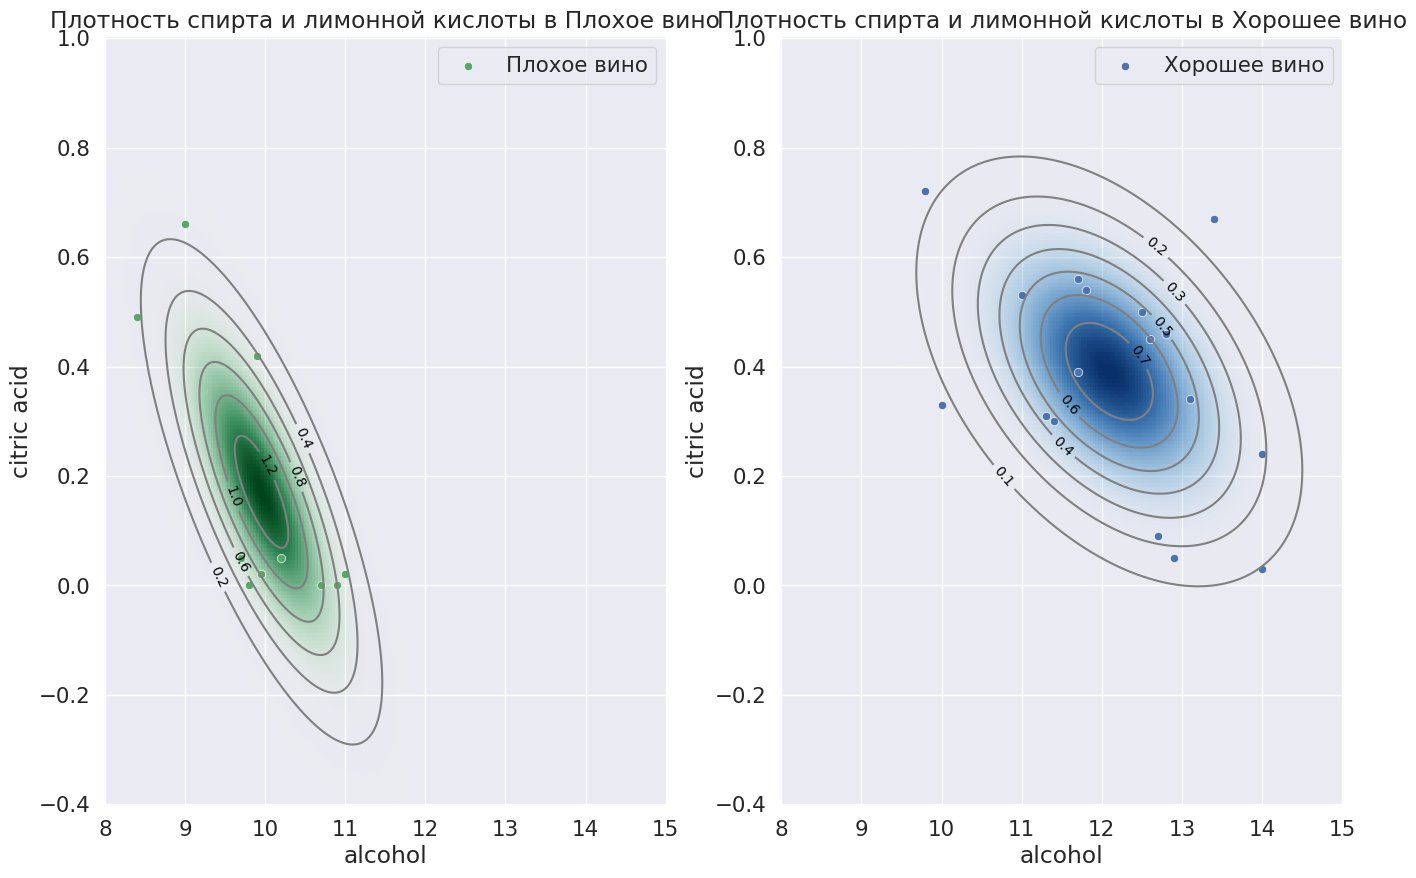

In [ ]:
plot_cmap(samples, means, pdfs, cmaps, titles, colors, X, Y)

Что можно сказать о вине, которому сомелье дали наивысший балл по сравнению с вином, которому дали наименьший балл, основываясь на график выше?

**Ответ:** Хорошее вино содержит заметно больше алкоголя и лимонной кислоты по сравнению с плохим. Так же у плохих вин разброс по содержанию лимонной кислоты больше чем содержание алкоголя

# Задача 3

В случаях, когда ошибка в значении параметра может дорого обойтись, применяют доверительное оценивание. Вместо точечного значения параметра оценкой является отрезок, в который истинное значение параметра попадает с высокой вероятностью.

Сгенерируйте выборку $X_1, ...,X_{100}$ из распределения $P_\theta$.

Для уровня доверия $\alpha = 0.95$ для всех $n \leq 100$
изобразите на графиках в координатах $(n, \theta)$
* Доверительный интервал, построенный по оценке $\widehat{\theta}$ (который, помимо этого, нужно теоретически посчитать и написать)
* График оценки $\widehat{\theta}$
* Точки выборки

Для отрисовки доверительного интервала используйте `plt.fill_between`. Не забывайте про параметр `alpha`.

Для того, чтобы избежать дублирования кода, рекомендуем написать функцию `draw_confidence_interval`, изображающую на графике все необходимое.

В каждом случае при помощи моделирования проверьте, как часто параметр действительно попадает в свой доверительный интервал (генерируйте выборку выборок, по которой стройте выборку доверительных интервалов)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
alpha = 0.95
quantile_minus = (1 - alpha) / 2
quantile_plus = (1 + alpha) / 2
N = 100

In [ ]:
def draw_confidence_interval(sample, low, high, est, theta,  limit, n = N):
  plt.figure(figsize=(10, 6))
  plt.fill_between(np.arange(1, n + 1), low, high, color = 'blue', alpha = 0.2, label=f'95% CI for θˆ')
  plt.plot(np.arange(1, n + 1), est, 'g-', color = 'red', label='estimate')
  plt.plot(np.arange(1, n + 1), theta, color = 'blue', label='θˆ')
  plt.scatter(np.arange(1, n + 1), sample, color = 'green', alpha = 0.5, label='Sample Points')
  plt.xlabel('Sample Size (n)')
  plt.ylabel('Parameter Value (θ)')
  plt.title('Confidence Interval and Point Estimate for θ')
  plt.legend()
  plt.ylim(limit)
  plt.grid(True)
  plt.show()


### 1. Равномерное распределение, $\theta = 10$, оценка $\widehat{\theta} = X_{(n)}$

<!-- Рассмотрим функцию $G(X, \theta) = \frac{X_{(n)}}{\theta}$ - она является центральной функцией потому что
$\forall t \in [0,1] : P_{\theta}(G(X, \theta) \le t) = t^n$ - то есть  распределение не зависит от $\theta$. Квантиль распределения имеет вид $x_p = p^{\frac1n}$

Тогда $P_{\theta} (z_{\frac{1-\gamma}{2}} \le  \frac{X_{(n)}}{\theta} \le z_{\frac{1+\gamma}{2}}) = P_{\theta} (\frac{X_{(n)}}{z_{\frac{1+\gamma}{2}}} \le {\theta} \le \frac{X_{(n)}}{z_{\frac{1-\gamma}{2}}})→\gamma$ -->

$(X_{(n)}, (1 - α)^{\frac{-1}{n}}X_{(n)}$

<ipython-input-55-8e65f50e0c3b>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(np.arange(1, n + 1), est, 'g-', color = 'red', label='estimate')


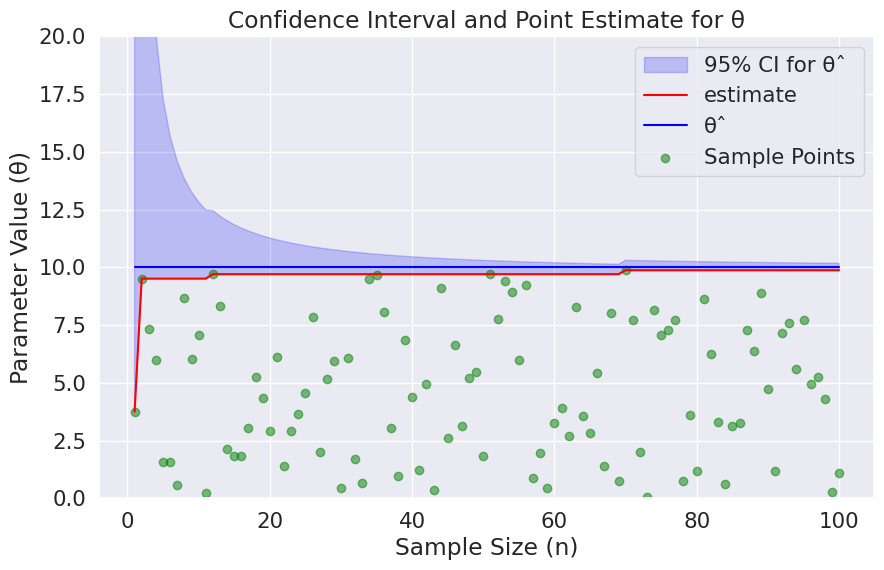

In [ ]:
true_theta_uniform = 10
sample_uniform = np.random.uniform(0, true_theta_uniform, size=N)
X_n = np.maximum.accumulate(sample_uniform)
# low = [X_n[i] / np.quantile(X_n, quantile_plus) for i in range(N)]
# high = [X_n[i] / np.quantile(X_n, quantile_minus) for i in range(N)]
c = (1-alpha) ** (-1/np.arange(1, N+1))

low = X_n
high = X_n * c
draw_confidence_interval(sample_uniform, low, high, X_n, [true_theta_uniform]*N, (0, 20), N)

### 2. Распределение Коши, $\theta = 10$, оценка — медиана

Медиана для распределения Коши является ассимптотически нормальной оценкой.

$$sqrt(n)(\mu - \theta) →^d N(0, \frac{\pi^2}{4})$$

$$P_{\theta} (\mu - \frac{z_{\frac{1+\gamma}{2}}\pi}{2\sqrt(n)} \le \theta \le \mu +\frac{z_{\frac{1-\gamma}{2}}\pi}{2\sqrt(n)}) → \gamma$$

<ipython-input-55-8e65f50e0c3b>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(np.arange(1, n + 1), est, 'g-', color = 'red', label='estimate')


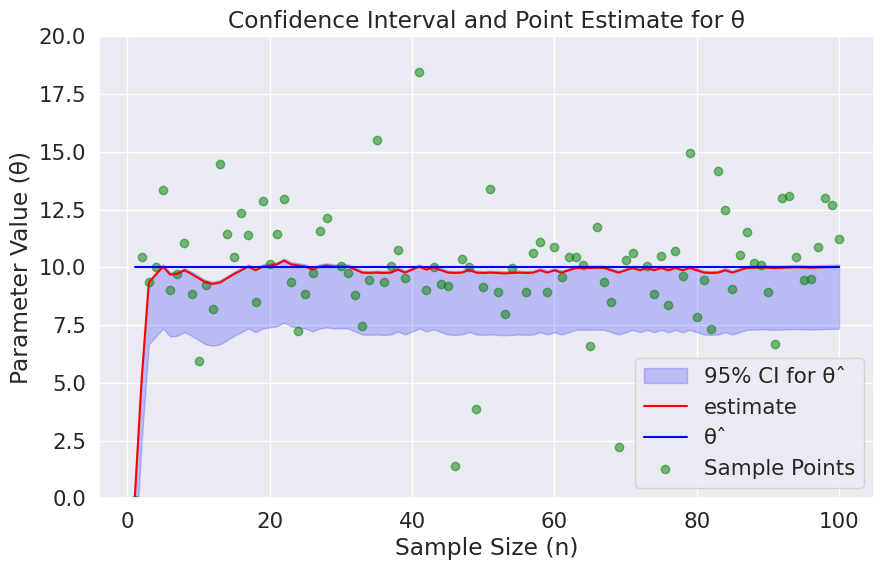

In [ ]:
true_theta_cauchy = 10
sample_cauchy = sps.cauchy.rvs(loc=true_theta_cauchy, size=N)
median_cauchy = [np.median(sample_cauchy[:i]) for i in range(1, N + 1)]
# quantile_left = sps.norm.ppf(quantile_plus)
# quantile_right = sps.norm.ppf(quantile_minus)
quantile_left = np.quantile(sample_cauchy, quantile_plus)
quantile_right = np.quantile(sample_cauchy, quantile_minus)
low = median_cauchy - ((quantile_left * np.pi) / (2 * np.sqrt(N)))
high = median_cauchy + ((quantile_right * np.pi) / (2 * np.sqrt(N)))
draw_confidence_interval(sample_cauchy, low, high, median_cauchy, [true_theta_cauchy]*N, (0,20), N)

### 3. Распределение Пуассона, $\theta = 10$, оценка $\widehat{\theta} = \overline{X}$

По ЦПТ
$\sqrt{n}\frac{\overline{X} - \theta}{\theta} → N(0, 1)$

Заменим дисперсии $\theta$ на состоятельную оценку $\overline{X}$

$P_{\theta}(\overline{X} - z_{\frac{1+\gamma}{2}} \sqrt{\frac{\overline{X}}{n}} \le \theta \le \overline{X} - z_{\frac{1-\gamma}{2}} \sqrt{\frac{\overline{X}}{n}}) → \gamma$

<ipython-input-55-8e65f50e0c3b>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(np.arange(1, n + 1), est, 'g-', color = 'red', label='estimate')


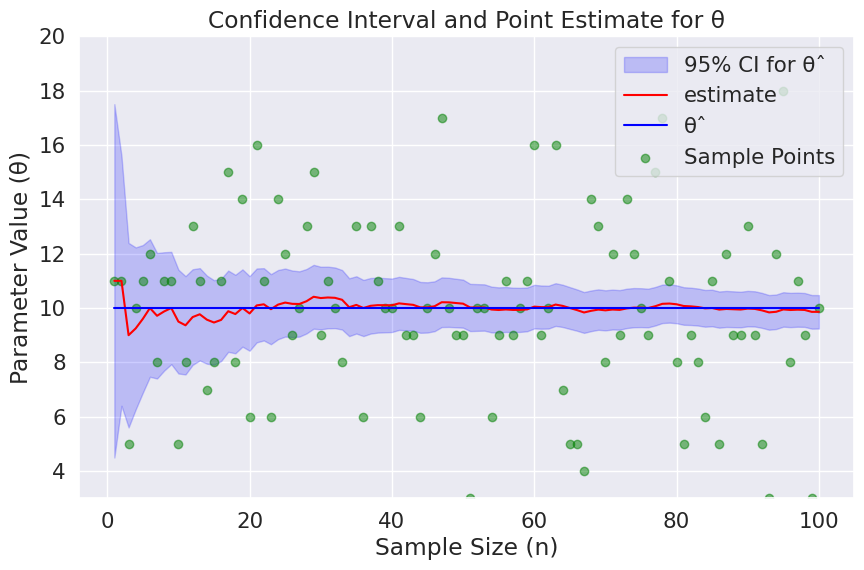

In [ ]:
true_theta_poisson = 10

quantile_left = sps.norm.ppf(quantile_plus)
quantile_right = sps.norm.ppf(quantile_minus)
sample_poisson = sps.poisson.rvs(true_theta_poisson, size=N)
est = np.cumsum(sample_poisson) / (np.arange(N) + 1)
low = est - (np.sqrt(est) / np.sqrt(np.arange(N) + 1)) * quantile_left
high = est - (np.sqrt(est) / np.sqrt(np.arange(N) + 1)) * quantile_right
mean_poisson =  np.cumsum(sample_poisson) / np.arange(1, N+1)
draw_confidence_interval(sample_poisson, low, high, mean_poisson, [true_theta_poisson]*N, (3, 20), N)

### 4. Гамма-распределение, $(\theta, \lambda) = (10, 3)$, $\lambda$ известна

$X_i \sim Г(\theta, \lambda)$

$\theta = {\overline{X}}/\lambda$

$\sqrt{n} (\overline{X} - \lambda \theta) → N(0, \lambda \theta^2)$

Тогда доверительный интервал для $\theta$ с неизвестным $\lambda$ :

$(\frac{\overline{X}}{\sqrt{\frac{\lambda}{n}}z_{(1+\gamma)/2} + λ}, \frac{\overline{X}}{\sqrt{\frac{\lambda}{n}}z_{(1-\gamma)/2} + λ})$
<!--
$(\frac{\lambda}{\overline{X}} - \sqrt{\frac{\lambda}{n}} \frac{z_{\frac{1+\gamma}{2}}}{\overline{X}}, \frac{\lambda}{\overline{X}} + \sqrt{\frac{\lambda}{n}} \frac{z_{\frac{1+\gamma}{2}}}{\overline{X}})$ - доверительный интервал  -->


<ipython-input-55-8e65f50e0c3b>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(np.arange(1, n + 1), est, 'g-', color = 'red', label='estimate')


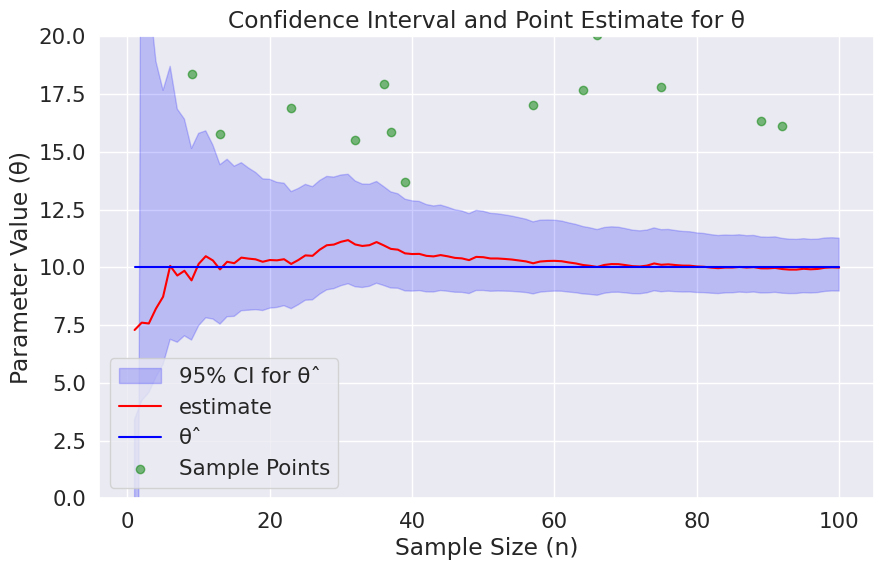

In [ ]:
import scipy.stats as sps
theta_true = 10

lambda_known = 3
sample_gamma = sps.gamma.rvs(a= theta_true, scale=lambda_known, size=N)
X_sum = np.cumsum(sample_gamma) / np.arange(1, N + 1)
est = X_sum / lambda_known
quantile_left = sps.norm.ppf(quantile_plus)
quantile_right = sps.norm.ppf(quantile_minus)

low =  X_sum / ((np.sqrt(lambda_known) / np.sqrt(np.arange(1, N+1))) *quantile_left + lambda_known)
high =  X_sum / ((np.sqrt(lambda_known) / np.sqrt(np.arange(1, N+1))) *quantile_right + lambda_known)
draw_confidence_interval(sample_gamma, low, high, est, [theta_true]*N, (0,20), N)

Сделайте вывод о том, насколько точен доверительный интервал в каждом случае? Насколько он широк? А что от него ожидается: быть шире или быть уже? От каких свойств распределения зависит ширина?

Вывод:

Все построенные интервалы являются асимптотическими, поэтому пока размер выборки небольшой то интервал может не содержать истинное значение параметра. У гамма-распределения интервал вначале имеет большую ширину,так же доверительный интервал равномерного распределения имеет большую ширину вначале, а с увеличением размера выборки очень сужается. Выбранный уровень доверия также влияет на ширину интервала: более высокий уровень доверия требует более широкий интервал

### Задача 4.

Точный доверительный интервал в условиях войны с чудовищами консульта строить нет ни времени, ни желания. Зато у нас есть целых два кандидата на его место: маги с востока предлагают использовать асимптотический доверительный интервал, как завещал их философ Айенсис, а маги с запада --- бутстрепный, как написано в их священных текстах. А какой лучше?

В этой задаче мы построим точный, асимптотический и бутстрепный доверительный интевалы для нормального распределения и сравним их.

Пусть $X_1, \dots, X_n$ — выборка из нормального распределения со средним $a$ и дисперсией $\sigma^2$, причем $\sigma$ неизвестна. Выпишите формулы

* точного доверительного итервала уровня доверия $\alpha$ для $a$:

* асимптотического доверительного итервала уровня доверия $\alpha$ для $a$

* бутстрепного доверительного итервала уровня доверия $\alpha$ для $a$


Построим точный доверительный интервал уровня доверия $α$

$\sigma \in (\overline{X} - T_{(n-1),(1+\gamma)/2} {\frac{S}{\sqrt{n-1}}}, \overline{X} + T_{(n-1),(1+\gamma)/2} {\frac{S}{\sqrt{n-1}}})$

<!-- $G(X, σ^2) = \sqrt{n} \frac{\sum_\limits{i = 1}^n{(X_i - a)}^2}{σ^2} \sim N(0, 1)$

$G(X, σ^2) \sim χ_{n}^2$

$P_{σ^2}(\frac{\sum_\limits{i = 1}^n{(X_i - a)}^2}{\chi_{n,(1+\gamma) / 2)}^2} \le σ^2 \le \frac{\sum_\limits{i = 1}^n{(X_i - a)}^2}{\chi_{n,(1-\gamma) / 2)}^2} ) = α$ -->

Асимптотический доверительный интервал
$\sigma \in (\overline{X} - z_{(1+\gamma)/2} \frac{S}{\sqrt{n}}, \overline{X} - z_{(1-\gamma)/2} \frac{S}{\sqrt{n}})$

<!-- воспользуемся теоремой Фишера

$\frac{(n-1)S^2}{\sigma^2} \sim \chi_{n-1}^2$

$\sigma^2 \in (\frac{(n-1)S^2}{\chi_{(1+\gamma)/2, n-1}^2}, \frac{(n-1)S^2}{\chi_{(1-\gamma)/2, n-1}^2})$ -->

Бутстрепный доверительный интервал

$(\overline{X} - z_{1+\gamma)/2}\sqrt{v_{boot}}, \overline{X} + z_{1+\gamma)/2}\sqrt{v_{boot}})$

Где $v_{boot}$ - бутстрепная оценка дисперсии

Для $n=30, \,a = 0$ постройте __на одном графике__ все три доверительных интервала, а также отметьте линией истинное значение $a$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import statistics as st

n = 30
a = 0
alpha = 0.95

np.random.seed(43)
X = sps.norm.rvs(loc = a, scale = 1, size = n)
X_mean = [np.mean(X[:i]) for i in range(1, n+1)]
S = np.var(X)

quantile_left = sps.norm.ppf(quantile_plus)
quantile_right = sps.norm.ppf(quantile_minus)
z_quantile = sps.norm.ppf(1 - alpha / 2)
students_quantile = sps.t.ppf(quantile_plus, n - 1)
# доверительный интервал
extract_lower = X_mean - students_quantile*(np.sqrt(S) / np.sqrt(n-1))
extract_high = X_mean + students_quantile*(np.sqrt(S) / np.sqrt(n-1))

# асимптотический доверительный интервал
S = [st.variance(X[:i]) if i > 1 else X[0] for i in range(1,n+1)]
chi_high_asym = sps.chi2.ppf((1+alpha)/2, df = n-1)
chi_lower_asym = sps.chi2.ppf((1-alpha)/2, df = n-1)
asympt_lower = X_mean - quantile_left*(np.sqrt(S) / np.sqrt(n))
asympt_high = X_mean - quantile_right*(np.sqrt(S) / np.sqrt(n))

#бутстрепный доверительный интервал

# Бутстрепированные выборки и их выборочные дисперсии
num_bootstraps = 10
bootstrap_samples = np.random.choice(X, size=(n, num_bootstraps), replace=True)
bootstrap_sample_vars = np.var(bootstrap_samples, axis=0, ddof=1)

# Бутстрепная оценка дисперсии
v_boot = np.mean(bootstrap_sample_vars)

# Квантили стандартного нормального распределения
z_quantile = np.percentile(np.random.normal(size=num_bootstraps), (1 + alpha) / 2)

bootstrap_lower = X_mean - z_quantile*np.sqrt(v_boot)
bootstrap_high = X_mean + z_quantile*np.sqrt(v_boot)


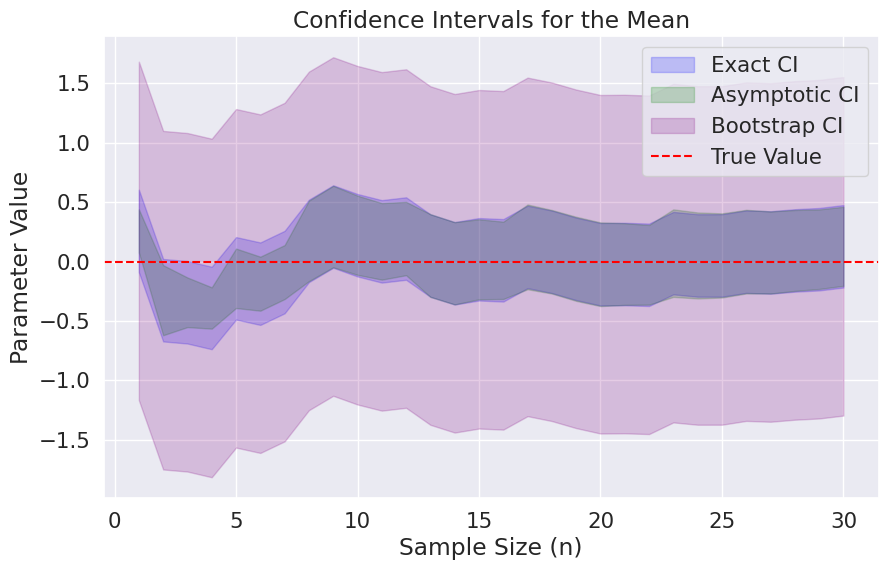

In [ ]:
plt.figure(figsize=(10, 6))
plt.fill_between(np.arange(1, n+1), extract_lower, extract_high, color='blue', alpha=0.2, label='Exact CI')
plt.fill_between(np.arange(1, n+1), asympt_lower, asympt_high, color='green', alpha=0.2, label='Asymptotic CI')
plt.fill_between(np.arange(1, n+1), bootstrap_lower, bootstrap_high, color='purple', alpha=0.2, label='Bootstrap CI')
plt.axhline(y=a, color='red', linestyle='--', label='True Value')
plt.xlabel('Sample Size (n)')
plt.ylabel('Parameter Value')
plt.title('Confidence Intervals for the Mean')
plt.legend()
plt.grid(True)
plt.show()


Начиная с некоторого размера выборки точный и доверительный интервал отличаютсянезначительно

Моделированием посчитайте вероятность того, что истинное значение параметра попадёт в интервал. В каком случае оно ближе к теоретическому (среди двух неточных интервалов)?

In [ ]:
mean = np.mean(X)
extract_coverage = 0
for i in range(n):
  extract_coverage += int(extract_lower[i] <= a <= extract_high[i])
asymptotic_coverage = 0
for i in range(n):
  asymptotic_coverage += int(asympt_lower[i] <= a <= asympt_high[i])
bootstrap_coverage = 0
for i in range(n):
  bootstrap_coverage += int(bootstrap_high[i] <= a <= bootstrap_lower[i])

print(f"Точный доверительный интервал: {100*extract_coverage / n} %")
print(f"Асимптотический доверительный интервал: {100*asymptotic_coverage / n} %")
print(f"Бутстрепный доверительный интервал: {100*bootstrap_coverage / n} %")

Точный доверительный интервал: 96.66666666666667 %
Асимптотический доверительный интервал: 86.66666666666667 %
Бутстрепный доверительный интервал: 100.0 %


Сделайте вывод о том, когда какой интервал использовать и как их использовать, чтобы получить хороший результат.

Вывод: Самый лучший результат получился при использовании бутстрепного доверительного интервала. Точный доверительный интервал показал хороший результат, та как выборка не большая. Асимптотический интервал показал резуьтат немного хуже, но можно заметить что при n > 5 истинное значение попадает в интервал, то есть при больших выборках результат может оказаться лучше. Бутстрепный доверительный интервал позволяет избежать предположений о распределении и дает некоторую степень робастности.

## Задача 5

И снова, реальные данные.

В этой задаче мы проанализируем изменение индекса качества воздуха (air quality index, AQI) для двух мегаполисов Индии за последние годы. Данные взяты с Kaggle (https://www.kaggle.com/rohanrao/air-quality-data-in-india)

In [ ]:
# !gdown https://drive.google.com/uc?id=1Y_mE_jlEF82UDf41l1LFMDHX_LHvF2SC

!gdown https://drive.google.com/file/d/1hvODMPkJPe0HLIGq8RgClN1_RSw2gfD

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:35: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1hvODMPkJPe0HLIGq8RgClN1_RSw2gfD
To: /content/1hvODMPkJPe0HLIGq8RgClN1_RSw2gfD
3.04kB [00:00, 20.5kB/s]


Загрузите файл `city_day.csv`. Нам понадобятся столбцы `City`, `Date` и `AQI`. При этом учтите, что:
* В дальнейшем мы будем работать с датами, поэтому используйте аргумент `parse_dates` чтобы корректо их распарсить
* Данные содержат пропуски, которые нужно удалить

Для удобства сохраните в отдельные поля `Month` и `Year` соответственно год и месяц, когда производились замеры

Нас будут интересовать два города: Мумбаи (Mumbai) и Калькутта (Kolkata). Сохраните данные по этим двум городам для всех днней с 1 июля 2018 года включительно

In [ ]:
import pandas as pd


city_day = pd.read_csv('city_day.csv', parse_dates=['Date'])[['City', 'Date', 'AQI']].dropna()
city_day

,City,Date,AQI
28,Ahmedabad,2015-01-29,209.0
29,Ahmedabad,2015-01-30,328.0
30,Ahmedabad,2015-01-31,514.0
31,Ahmedabad,2015-02-01,782.0
32,Ahmedabad,2015-02-02,914.0
...,...,...,...
29526,Visakhapatnam,2020-06-27,41.0
29527,Visakhapatnam,2020-06-28,70.0
29528,Visakhapatnam,2020-06-29,68.0
29529,Visakhapatnam,2020-06-30,54.0


In [ ]:
datetime = pd.DatetimeIndex(city_day['Date'])
city_day['Year'], city_day['Month'] = datetime.year, datetime.month
city_day

,City,Date,AQI,Year,Month
28,Ahmedabad,2015-01-29,209.0,2015,1
29,Ahmedabad,2015-01-30,328.0,2015,1
30,Ahmedabad,2015-01-31,514.0,2015,1
31,Ahmedabad,2015-02-01,782.0,2015,2
32,Ahmedabad,2015-02-02,914.0,2015,2
...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,41.0,2020,6
29527,Visakhapatnam,2020-06-28,70.0,2020,6
29528,Visakhapatnam,2020-06-29,68.0,2020,6
29529,Visakhapatnam,2020-06-30,54.0,2020,6


In [ ]:
mumbai = city_day[(city_day['City'] == 'Mumbai') & (city_day['Date'] >= pd.Timestamp(2018, 7, 1))]
kolkata = city_day[(city_day['City'] == 'Kolkata') & (city_day['Date'] >= pd.Timestamp(2018, 7, 1))]

In [ ]:
mumbai

,City,Date,AQI,Year,Month
23132,Mumbai,2018-07-01,88.0,2018,7
23133,Mumbai,2018-07-02,77.0,2018,7
23134,Mumbai,2018-07-03,89.0,2018,7
23135,Mumbai,2018-07-04,75.0,2018,7
23136,Mumbai,2018-07-05,68.0,2018,7
...,...,...,...,...,...
23859,Mumbai,2020-06-27,64.0,2020,6
23860,Mumbai,2020-06-28,64.0,2020,6
23861,Mumbai,2020-06-29,54.0,2020,6
23862,Mumbai,2020-06-30,54.0,2020,6


In [ ]:
kolkata

,City,Date,AQI,Year,Month
19114,Kolkata,2018-07-01,58.0,2018,7
19115,Kolkata,2018-07-02,62.0,2018,7
19116,Kolkata,2018-07-03,50.0,2018,7
19117,Kolkata,2018-07-04,58.0,2018,7
19118,Kolkata,2018-07-05,57.0,2018,7
...,...,...,...,...,...
19841,Kolkata,2020-06-27,37.0,2020,6
19842,Kolkata,2020-06-28,43.0,2020,6
19843,Kolkata,2020-06-29,48.0,2020,6
19844,Kolkata,2020-06-30,47.0,2020,6


В предыдущих задачах мы строили доверительные интервалы в предположении, что выборка взята из параметрического семейства распределений. Но что делать в случае, когда подобное предположение сделать нельзя? Оказывается, в этом случае можно строить доверительный интервал с помощью бутстрепа.

Пусть $X_1, \dots, X_n$ — выборка, для которой мы хотим оценить некоторую величину $\theta$. Построим $k$ бутстепных выборок, и получим по ним оценки $\theta^*_1, \dots, \theta^*_k$. Отсортируем их, чтобы получить вариационный ряд $\theta^*_{(1)}, \dots, \theta^*_{(k)}$. Тогда получим, что
$$
C^* = \left(\theta^*_{(\lfloor k (1 + \alpha) / 2 \rfloor)},
\theta^*_{(\lceil k (1 - \alpha) / 2 \rceil)} \right)
$$
будет (приблизительным) доверительным интервалом для $\theta$ уровня доверия $\alpha$.

Для каждого месяца с июля 2018 по июнь 2020 включтельно постройте бутстрепный доверительный интервал для __среднего значения AQI__. В этом вам помогут следующие вспомогательные функции:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def get_interval_bootstrap(samples, k = 1000, alpha = 0.95):
  ''' k * len(sample) - значит элементы будут повторятся'''
  samples = np.random.choice(samples, size = k*len(samples)).reshape(k, len(samples))
  # возьмем среднее в качестве оценки
  estimate = np.sort(np.mean(samples, axis = -1))
  quantile_left = k * (1 + alpha)/2
  quantile_right = k * (1 - alpha)/2
  # наш интервал
  return (estimate[int(quantile_left)], estimate[int(quantile_right)])


Постройте на одном графике доверительные интервалы для Мумбаи и Калькутты. Также отметьте точками на графике истинный средний AQI и соедините точки линиями. Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

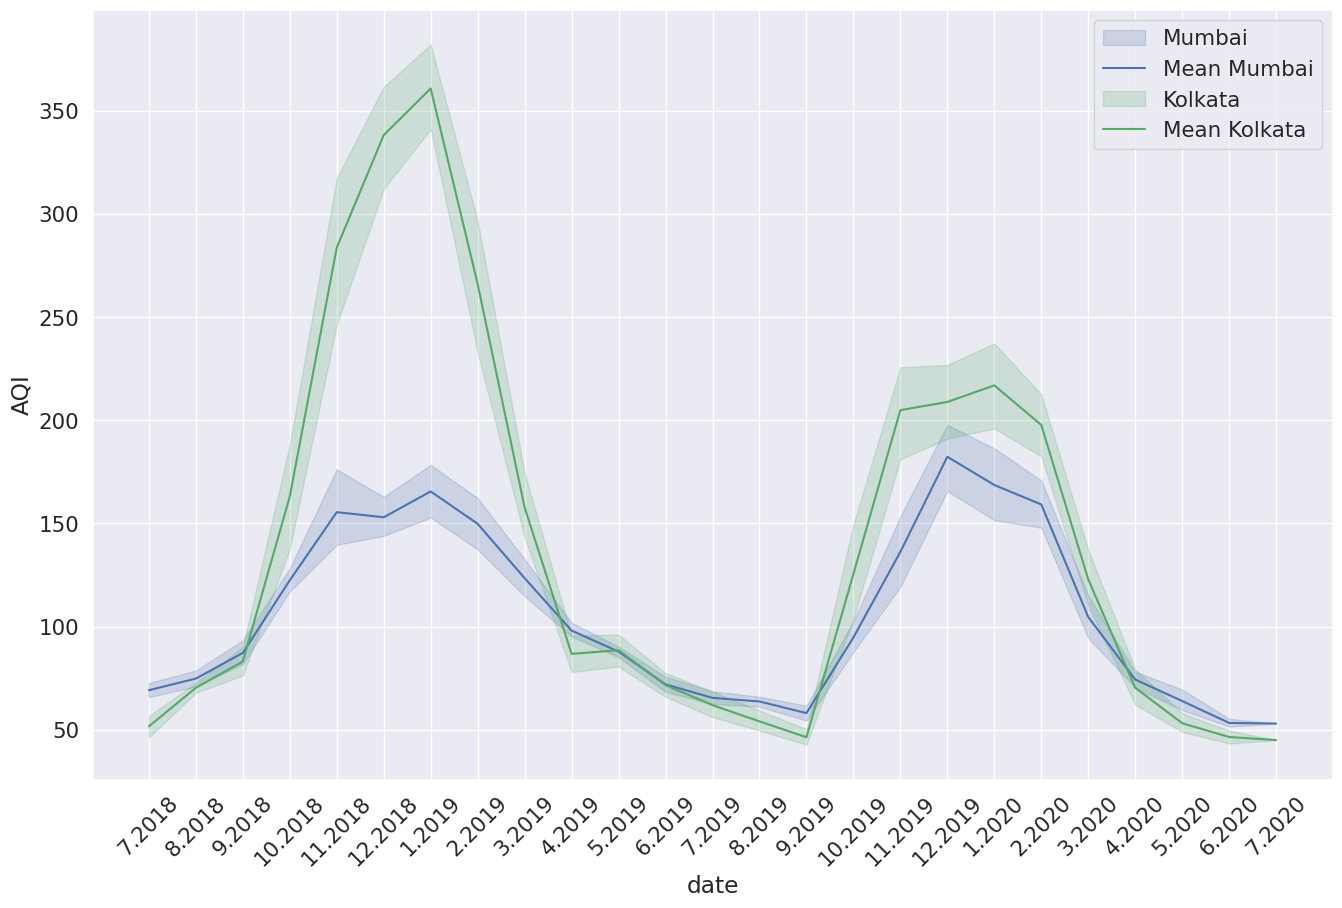

In [ ]:
mumbai_m_y = mumbai[['Month', 'Year']].drop_duplicates().values[:]
x = [f"{month}.{year}" for month, year in mumbai_m_y]
bootstrap_interval_mumbai = np.array([get_interval_bootstrap(mumbai[(mumbai['Year'] == year) & (mumbai['Month'] == month)]['AQI']) for month, year in mumbai_m_y])
m_lower = bootstrap_interval_mumbai[:,0]
m_high = bootstrap_interval_mumbai[:,1]
mumbai_mean = np.array([np.mean(mumbai[(mumbai['Year'] == year) & (mumbai['Month'] == month)]['AQI']) for month, year in mumbai_m_y])

kolkata_m_y = kolkata[['Month', 'Year']].drop_duplicates().values[:]
xx = [f"{month}.{year}" for month, year in kolkata_m_y]
bootstrap_interval_mumbai = np.array([get_interval_bootstrap(kolkata[(kolkata['Year'] == year) & (kolkata['Month'] == month)]['AQI']) for month, year in kolkata_m_y])
k_lower = bootstrap_interval_mumbai[:,0]
k_high = bootstrap_interval_mumbai[:,1]
kolkata_mean = np.array([np.mean(kolkata[(kolkata['Year'] == year) & (kolkata['Month'] == month)]['AQI']) for month, year in kolkata_m_y])




plt.figure(figsize = (16,10))
plt.fill_between(xx, m_lower, m_high, alpha = 0.2, color = 'b', label = 'Mumbai')
plt.plot(x, mumbai_mean, color = 'b', label = 'Mean Mumbai')
plt.fill_between(xx, k_lower, k_high, alpha = 0.2, color = 'g', label = 'Kolkata')
plt.plot(x, kolkata_mean, color = 'g', label = 'Mean Kolkata')

plt.xticks(rotation=45)
plt.xlabel('date')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()

Посмотрите на получившийся график. Видны ли в нем какие-либо закономерности? С чем они могут быть связаны?

Показатель загрязнения воздуха в Мумбаи ниже почти весь год. Однако можно заметить что в летний период с 4-го по 9-й месяц показатели в городах очень близки, и в Мумбаи даже выше. Возможно это как-то связано с числом осадков (больше дождей в летнее время например)
После 2019 года показатель в мумбаи вырос в зимний период, а в Калькутте наоборот значительно уменьшился по сравнению с предыдущей зимой

Теперь давайте сравним качество воздуха в апреле 2019 и апреле 2020 годов. Постройте __на одном графике__
* доверительные интервалы для апреля 2019 и апреля 2020 для Мумбаи
* истинные средние значения (с помощью `plt.hlines`)
* точки выборки

Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

То же самое сделайте для Калькутты.

In [ ]:
# что бы не было копипасты реализуем функцию для графика
def show_plot(x, samples_2019, lower_2019, high_2019, mean_2019, samples_2020, lower_2020, high_2020, mean_2020, city):
  plt.figure(figsize = (16,10))

  plt.fill_between(x, lower_2019, high_2019, alpha = 0.2, color = 'b', label = '2019')
  plt.hlines(mean_2019, xmin = 1, xmax = len(x), color = 'b', label='mean 2019')
  plt.scatter(x, samples_2019, color = 'b', label='samples 2019')

  plt.fill_between(x, lower_2020, high_2020, alpha = 0.2, color = 'g', label = '2020')
  plt.hlines(mean_2020, xmin = 1, xmax = len(x), color = 'g', label='mean 2020')
  plt.scatter(x, samples_2020, color = 'g', label = 'samples 2020')
  plt.xticks(rotation=45)
  plt.title(f'Доверительные интервалы в апреле 2019 и 2020 года в {city}')
  plt.xlabel('date')
  plt.ylabel('AQI')
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
def plot_interval_april(city, name):
  april_2019 = city[(city['Year'] == 2019) & (city['Month'] == 4)]['AQI']
  april_2020 = city[(city['Year'] == 2020) & (city['Month'] == 4)]['AQI']

  bootstrap_april_2019 = get_interval_bootstrap(april_2019)
  bootstrap_april_2020 = get_interval_bootstrap(april_2020)

  mean_2019 = np.mean(april_2019)
  mean_2020 = np.mean(april_2020)

  days = np.arange(1,31)

  show_plot(days, april_2019, bootstrap_april_2019[0], bootstrap_april_2019[1], mean_2019,\
            april_2020, bootstrap_april_2020[0], bootstrap_april_2020[1], mean_2020, name)

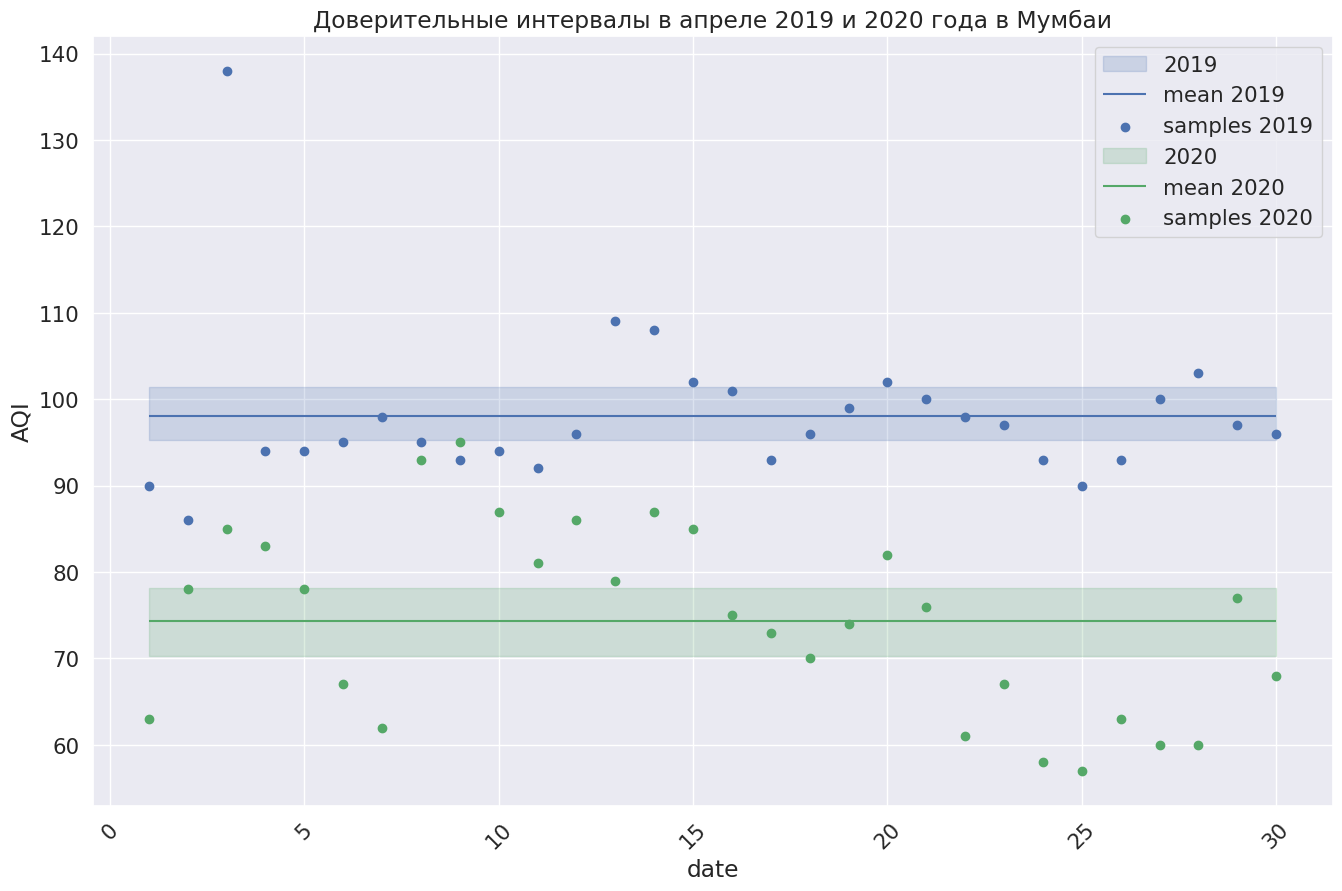

In [ ]:
plot_interval_april(mumbai, "Мумбаи")

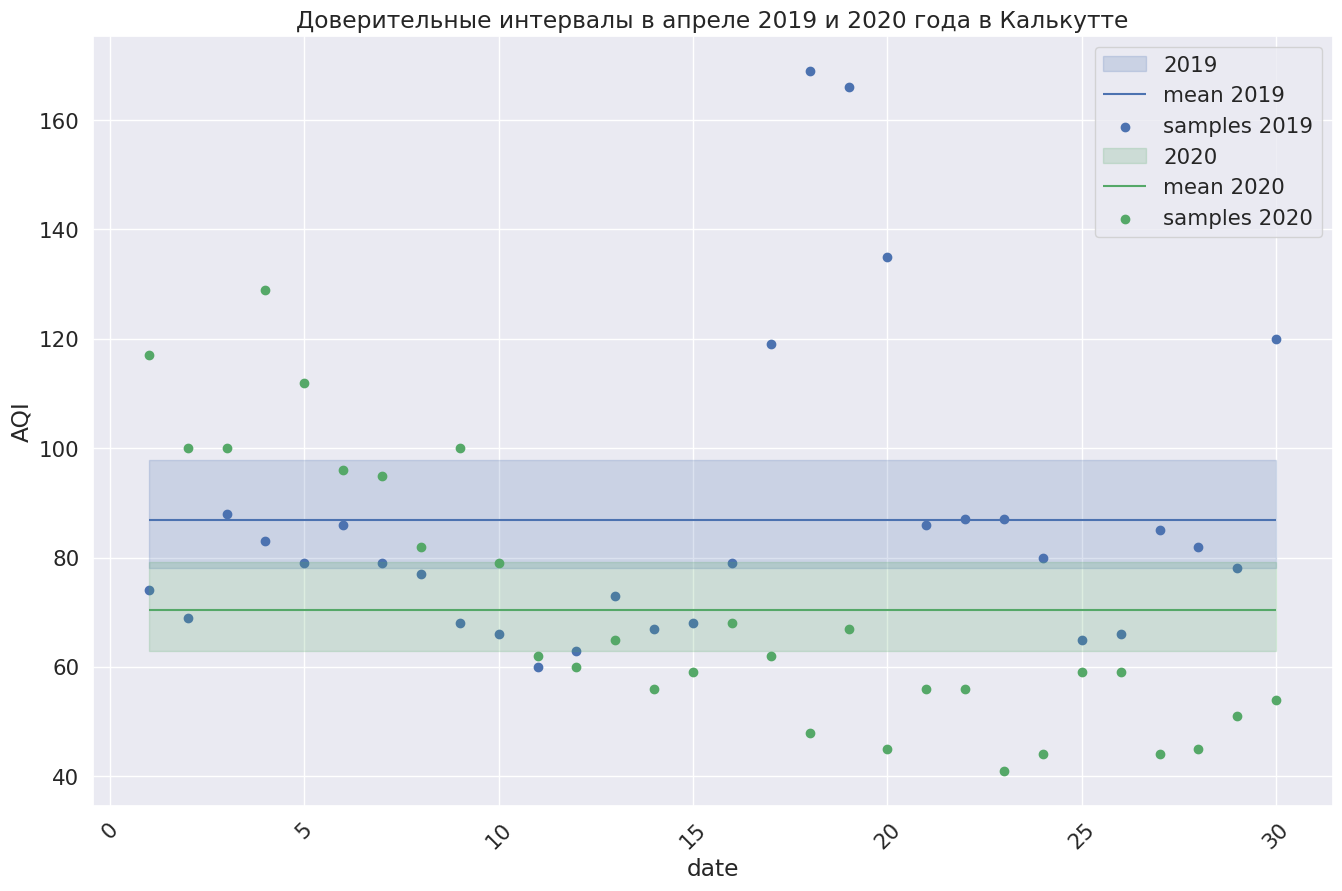

In [ ]:
plot_interval_april(kolkata, 'Калькутте')

Сделайте выводы. Что можно сказать про доверительные интервалы в каждом из случаев? Какие прикладные выводы о загрязнении воздуха можно сделать из Ваших результатов?

В Мумбаи значительно улучшился воздух в апреле 2020 года, а вот у Калькутте изменения незначительны. То есть происходят некоторые природные изменения или же государство начало принимать меры по загряднению. Так же интервал у Мумбаи уже чем у Калькутты это говорит о маленькой изменчивости данных, если посмотреть на общий график то действительно по сравнению с Калькуттой изменения менее колеблющиеся.